In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.base import BaseEstimator
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.neighbors import  KNeighborsRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
random_state = 123*987*4-1
models_to_average = 50

In [3]:
real_data = pd.read_csv("./datasets/real_ds_shorthouses.csv")
synt_data_distilgpt2 = pd.read_csv('./datasets/synt_ds_distillgpt2_shorthouses_3epochs_temp1.9.csv')
synt_data_gpt2xl = pd.read_csv("./datasets/synt_ds_gpt2xl_shorthouses_3epochs_temp1.9.csv")
synt_data_cerebras = pd.read_csv("./datasets/synt_ds_cerebras13_shorthouses_3epochs_temp1.9.csv")
synt_data_phi = pd.read_csv("./datasets/synt_ds_phi15_shorthouses_3epochs_temp1.9.csv")
control_dataset = pd.read_csv("./datasets/real_ds_shorthouses_control.csv")

In [4]:
real_data.drop(columns="Unnamed: 0",inplace=True)
synt_data_distilgpt2.drop(columns="Unnamed: 0",inplace=True)
synt_data_gpt2xl.drop(columns="Unnamed: 0",inplace=True)
synt_data_cerebras.drop(columns="Unnamed: 0",inplace=True)
synt_data_phi.drop(columns="Unnamed: 0",inplace=True)
control_dataset.drop(columns="Unnamed: 0",inplace=True) 


# Data analysis

In [5]:
real_data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16640.000000,16640.000000,16640.000000,16640.000000,16640.000000,16640.000000,16640.000000,16640.000000,16640.000000
mean,3.868659,28.579147,5.420879,1.095926,1429.048137,3.068690,35.637668,-119.575062,2.064754
std,1.890039,12.582832,2.509716,0.476001,1131.440157,10.881187,2.135661,2.002243,1.149140
min,0.499900,1.000000,0.888889,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.556800,18.000000,4.434536,1.005894,792.000000,2.427894,33.940000,-121.800000,1.194750
50%,3.537750,29.000000,5.226145,1.048756,1168.000000,2.818506,34.260000,-118.500000,1.802500
75%,4.762850,37.000000,6.050922,1.099480,1724.250000,3.286007,37.720000,-118.010000,2.641000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


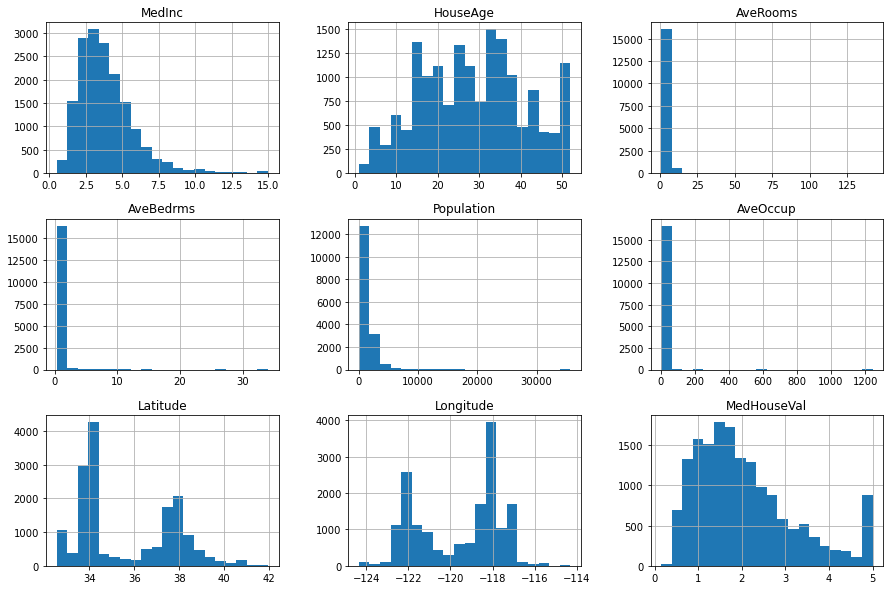

In [6]:
real_data.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [7]:
synt_data_distilgpt2.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,1.664000e+04,16640.000000,1.664000e+04,1.664000e+04,1.664000e+04,1.664000e+04,16640.000000,1.664000e+04,16640.000000
mean,3.616827e+06,54.974536,2.182428e+18,inf,1.204115e+15,1.198846e+29,200.636267,-9.119448e+03,2.082028
std,4.233912e+08,653.843032,2.269135e+20,NaN,8.809567e+16,1.546465e+31,5373.950975,9.484193e+05,1.150695
min,-1.006100e+04,2.000000,-1.222425e+02,-1.222043e+16,1.000000e+00,-1.217737e+02,-190.820000,-1.211221e+08,0.149990
25%,2.603025e+00,18.000000,4.366880e+00,9.906003e-01,9.710000e+02,2.482783e+00,33.910000,-1.220440e+02,1.214000
50%,4.007766e+00,28.000000,5.593498e+00,1.041352e+00,1.401034e+03,3.104272e+00,35.940000,-1.193000e+02,1.821000
75%,6.142050e+00,38.000000,7.637319e+00,1.132435e+00,2.364000e+03,4.284914e+00,38.190000,-1.178800e+02,2.660250
max,5.430066e+10,78212.000000,2.913262e+22,inf,7.220155e+18,1.994880e+33,523037.000000,9.056100e+04,5.000010


ValueError: supplied range of [-1.2220431534286946e+16, inf] is not finite

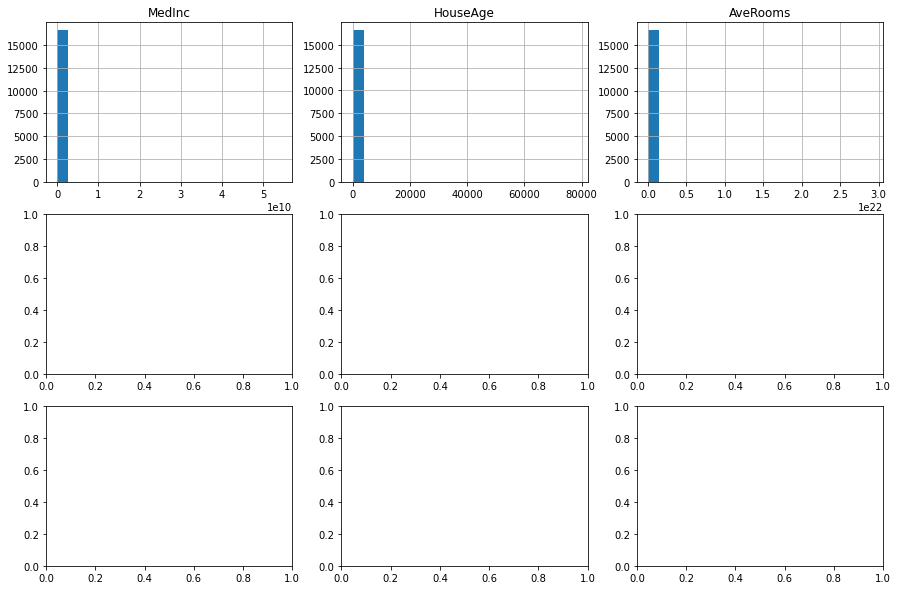

In [8]:
synt_data_distilgpt2.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [9]:
synt_data_gpt2xl.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16640.000000,16640.000000,1.664000e+04,1.664000e+04,1.664000e+04,1.664000e+04,1.664000e+04,1.664000e+04,16640.00000
mean,106.420015,30.339708,2.484044e+13,2.907265e+13,1.189902e+11,1.256992e+14,2.676411e+10,-3.182848e+11,2.07316
std,4619.417276,125.322788,6.992384e+14,1.523458e+15,9.369864e+12,1.025049e+16,2.132992e+12,1.901574e+13,1.15978
min,-928.000000,0.926000,7.142857e-01,-1.245556e+17,9.664804e-01,6.933333e-01,-1.178500e+02,-1.242765e+15,0.14999
25%,2.590600,16.000000,4.506346e+00,9.956791e-01,9.590000e+02,2.491619e+00,3.392000e+01,-1.218900e+02,1.18475
50%,3.669100,26.000000,5.478953e+00,1.045168e+00,1.327000e+03,2.992809e+00,3.510000e+01,-1.191700e+02,1.81300
75%,5.231750,36.000000,7.074916e+00,1.125820e+00,2.203250e+03,3.664356e+00,3.781000e+01,-1.179000e+02,2.66400
max,338051.000000,5240.000000,4.929060e+16,1.244251e+17,9.664068e+14,1.317871e+18,2.637795e+14,1.120339e+07,5.00001


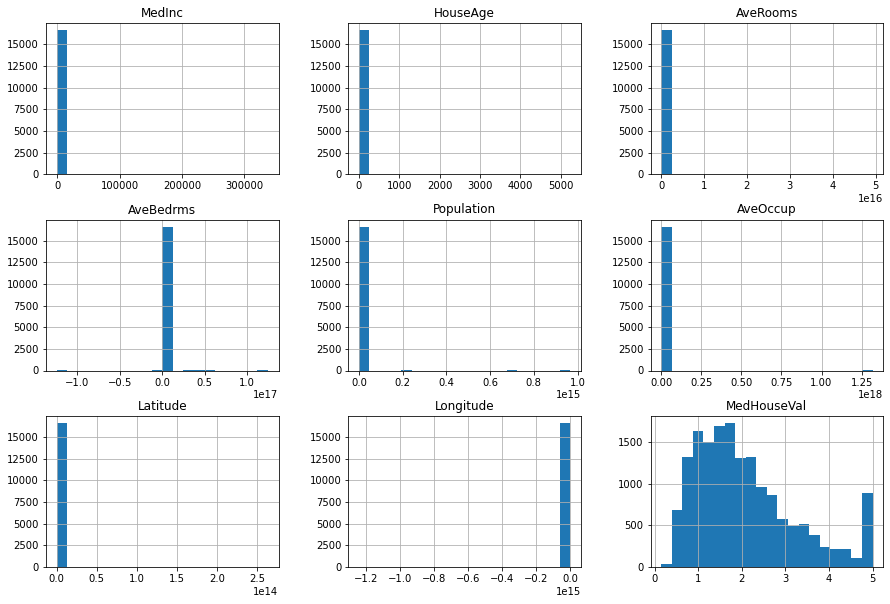

In [10]:
synt_data_gpt2xl.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [11]:
synt_data_cerebras.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16640.000000,16640.000000,1.664000e+04,1.664000e+04,1.664000e+04,1.664000e+04,16640.000000,1.664000e+04,16640.000000
mean,7.738747,27.583178,2.015472e+11,7.860729e+12,6.538784e+09,2.046177e+12,95.997784,-5.492458e+10,2.051911
std,132.667369,52.759643,9.169512e+12,8.633489e+14,5.414346e+11,4.623144e+13,2789.780698,6.897733e+12,1.145113
min,-131.547000,0.911073,-1.373413e+02,-1.185735e+14,1.000000e+00,-1.241600e+02,-124.030000,-8.896194e+14,0.149990
25%,2.485525,16.000000,4.480909e+00,9.982901e-01,9.590000e+02,2.485405e+00,33.940000,-1.218800e+02,1.185000
50%,3.585050,26.000000,5.444905e+00,1.050000e+00,1.334000e+03,2.988255e+00,35.300000,-1.192600e+02,1.789500
75%,5.090875,36.000000,6.788395e+00,1.140797e+00,2.205000e+03,3.639812e+00,37.810000,-1.179200e+02,2.625000
max,13169.000000,3850.000000,8.811050e+14,1.111111e+17,5.381045e+13,2.134752e+15,335593.000000,3.709400e+02,5.000010


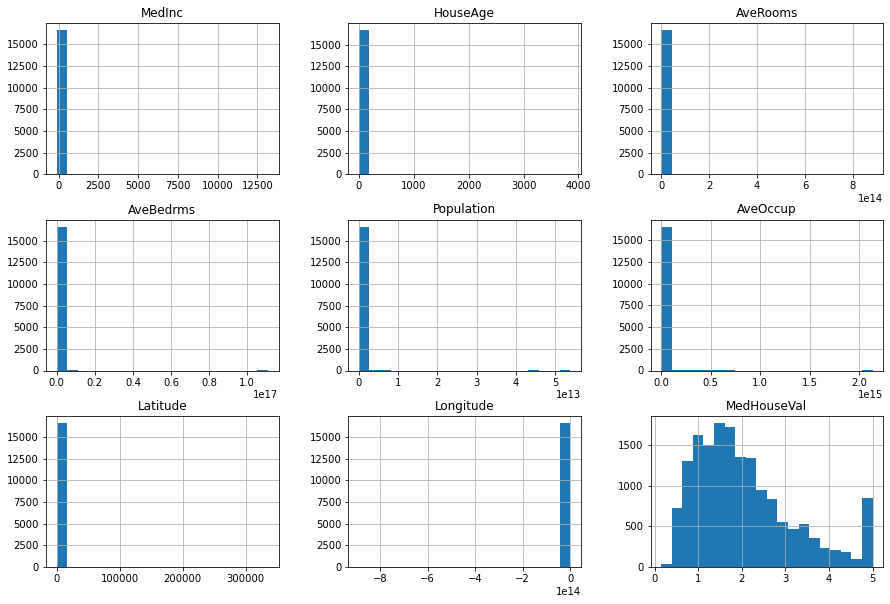

In [12]:
synt_data_cerebras.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [13]:
synt_data_phi.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,16640.000000,16640.000000,1.664000e+04,1.664000e+04,16640.000000,1.664000e+04,16640.000000,1.664000e+04,16640.000000
mean,5.896374,29.316167,2.380736e+14,4.654072e+13,1759.194663,8.702211e+13,55.402681,-1.449187e+10,2.055285
std,89.461183,103.876124,2.808174e+16,1.480886e+15,2166.510793,2.291219e+15,696.501835,1.321822e+12,1.147076
min,-1.145800,0.902721,7.037037e-01,-4.528302e+14,1.000000,-1.160131e+14,-122.400000,-1.206684e+14,0.149990
25%,2.526800,16.000000,4.458658e+00,9.950984e-01,965.000000,2.471689e+00,33.930000,-1.218800e+02,1.185000
50%,3.601600,26.000000,5.388347e+00,1.044954e+00,1331.000000,2.980055e+00,35.170000,-1.192650e+02,1.795000
75%,5.086525,36.000000,6.693523e+00,1.115784e+00,2165.000000,3.534953e+00,37.770000,-1.179300e+02,2.639000
max,9976.000000,5225.000000,3.611537e+18,1.104033e+17,71776.000000,1.976545e+17,37122.250000,1.304980e+03,5.000010


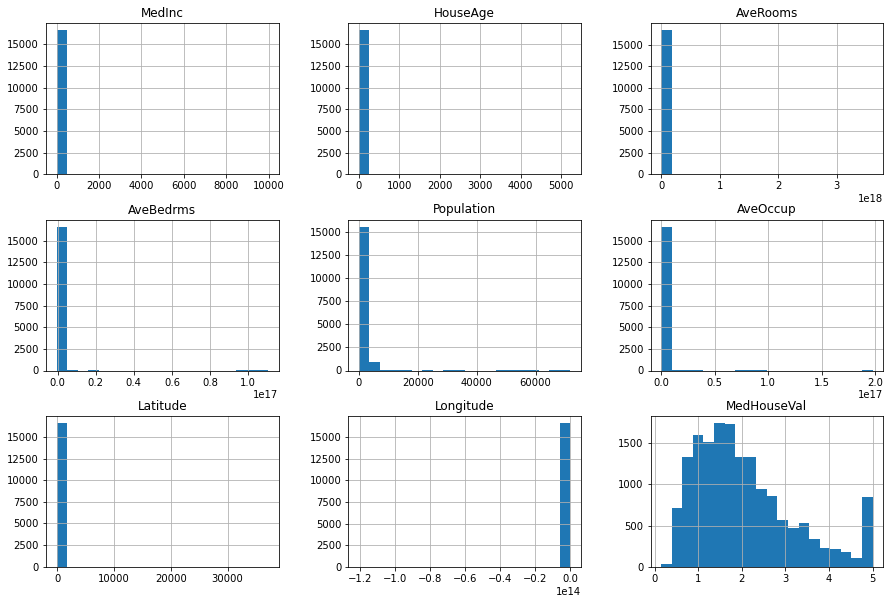

In [14]:
synt_data_phi.hist(bins=20, grid=True, figsize=(15, 10), layout=(3, 3))
plt.show()

In [15]:
synt_datasets = dict()
#synt_datasets['real'] = real_data
synt_datasets['distilgpt2'] = synt_data_distilgpt2
synt_datasets['gpt2xl'] = synt_data_gpt2xl
synt_datasets['cerebras'] = synt_data_cerebras
synt_datasets['phi'] = synt_data_phi

In [16]:
cols = real_data.columns

In [17]:
cols_compare = dict()
for col in cols:
    cols_compare[col] = {}
    cols_compare[col]['real'] = real_data[col].to_numpy()
    for synt in synt_datasets:
        cols_compare[col][synt] = synt_datasets[synt][col].to_numpy()


In [18]:
all_data = list()
for col in cols :
    all_data.append((col,[x for x in [(i,cols_compare[col][i]) for i in cols_compare[col]]]))


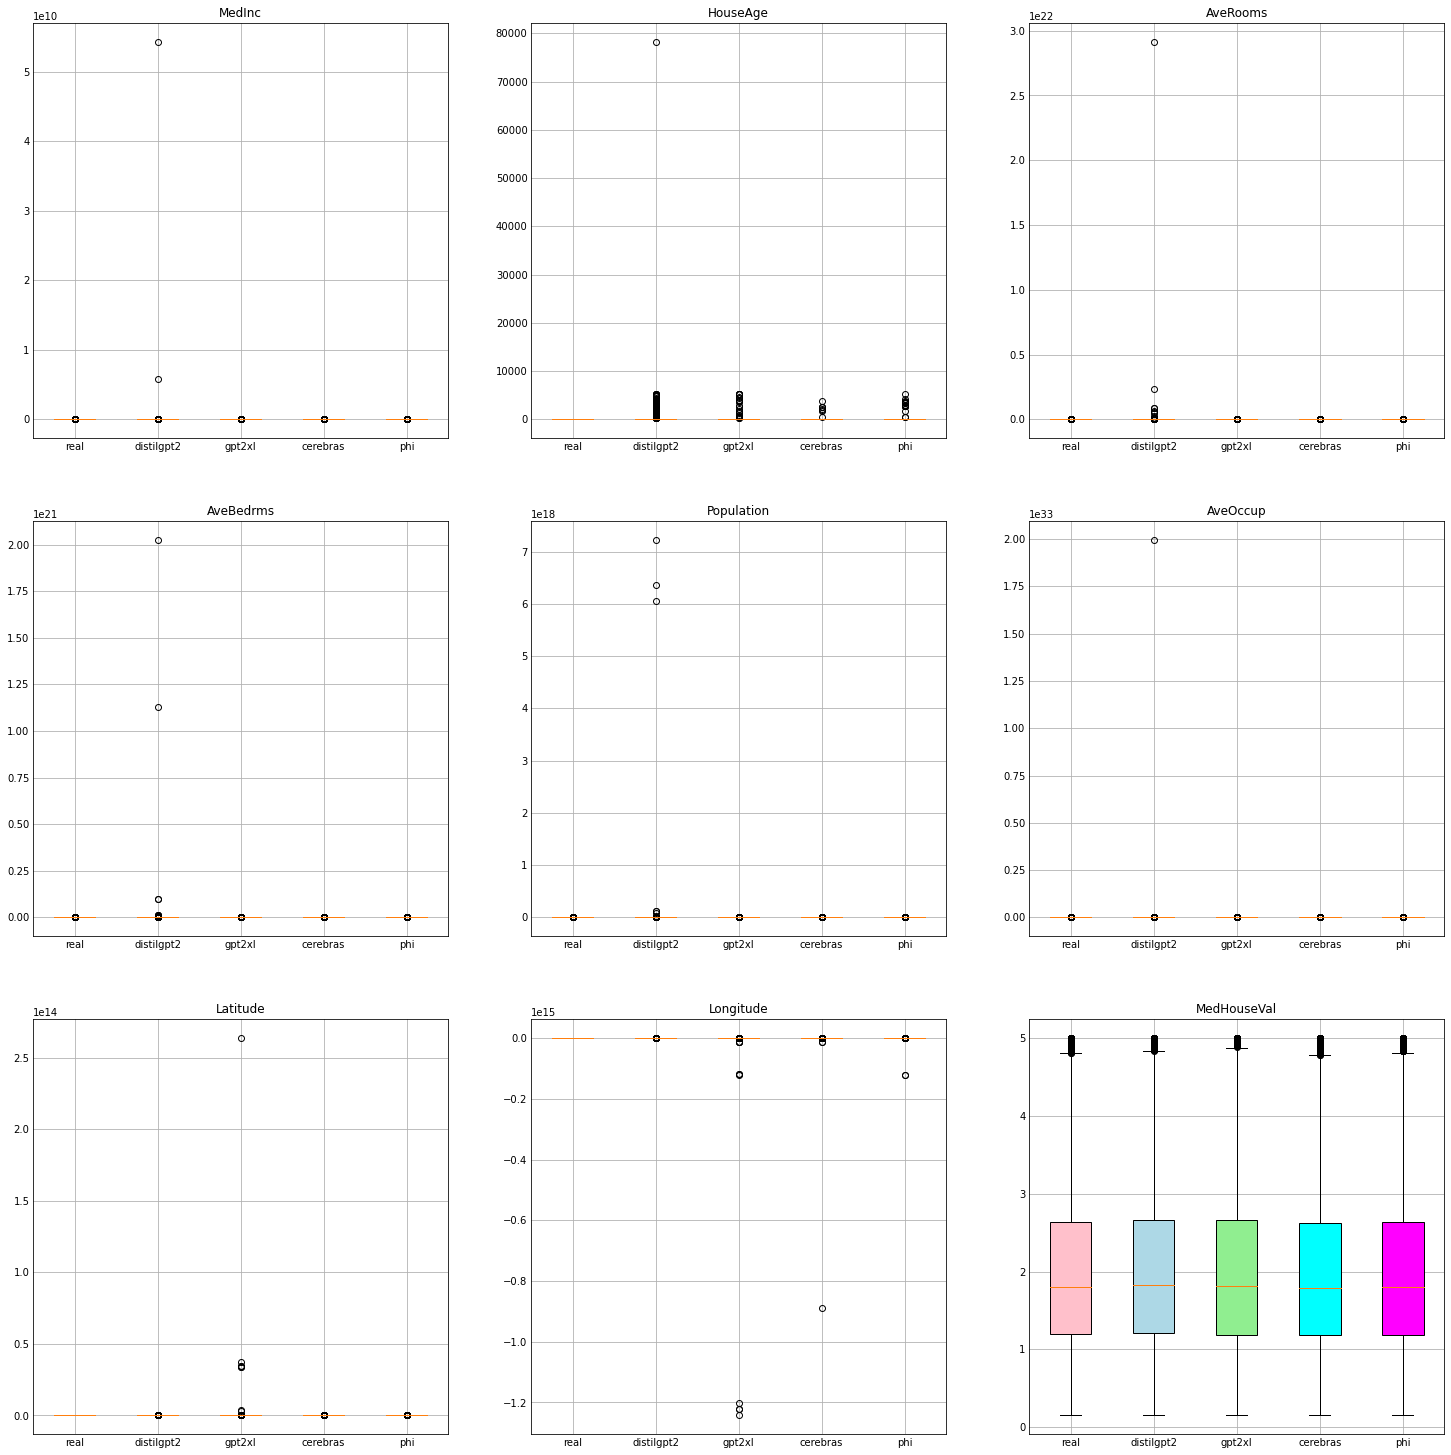

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data:
ncols=3
nrows=3

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(20, 20))
bplots = list()

for i, col in enumerate(all_data) :
    col_name = col[0]
    col_data = col[1]
    rw = i//ncols
    cl = i%ncols
    
    axs[rw,cl].set_title(col_name)
     
    bplots.append(axs[rw,cl].boxplot([x[1] for x in col_data],
                     vert=True,  # vertical box alignment
                     patch_artist=True,  # fill with color
                     labels=[x[0] for x in col_data]))  # will be used to label x-ticks
           
#fill with colors
colors = ['pink', 'lightblue', 'lightgreen','cyan','magenta','yellow',]
for bplot in bplots:
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.show()

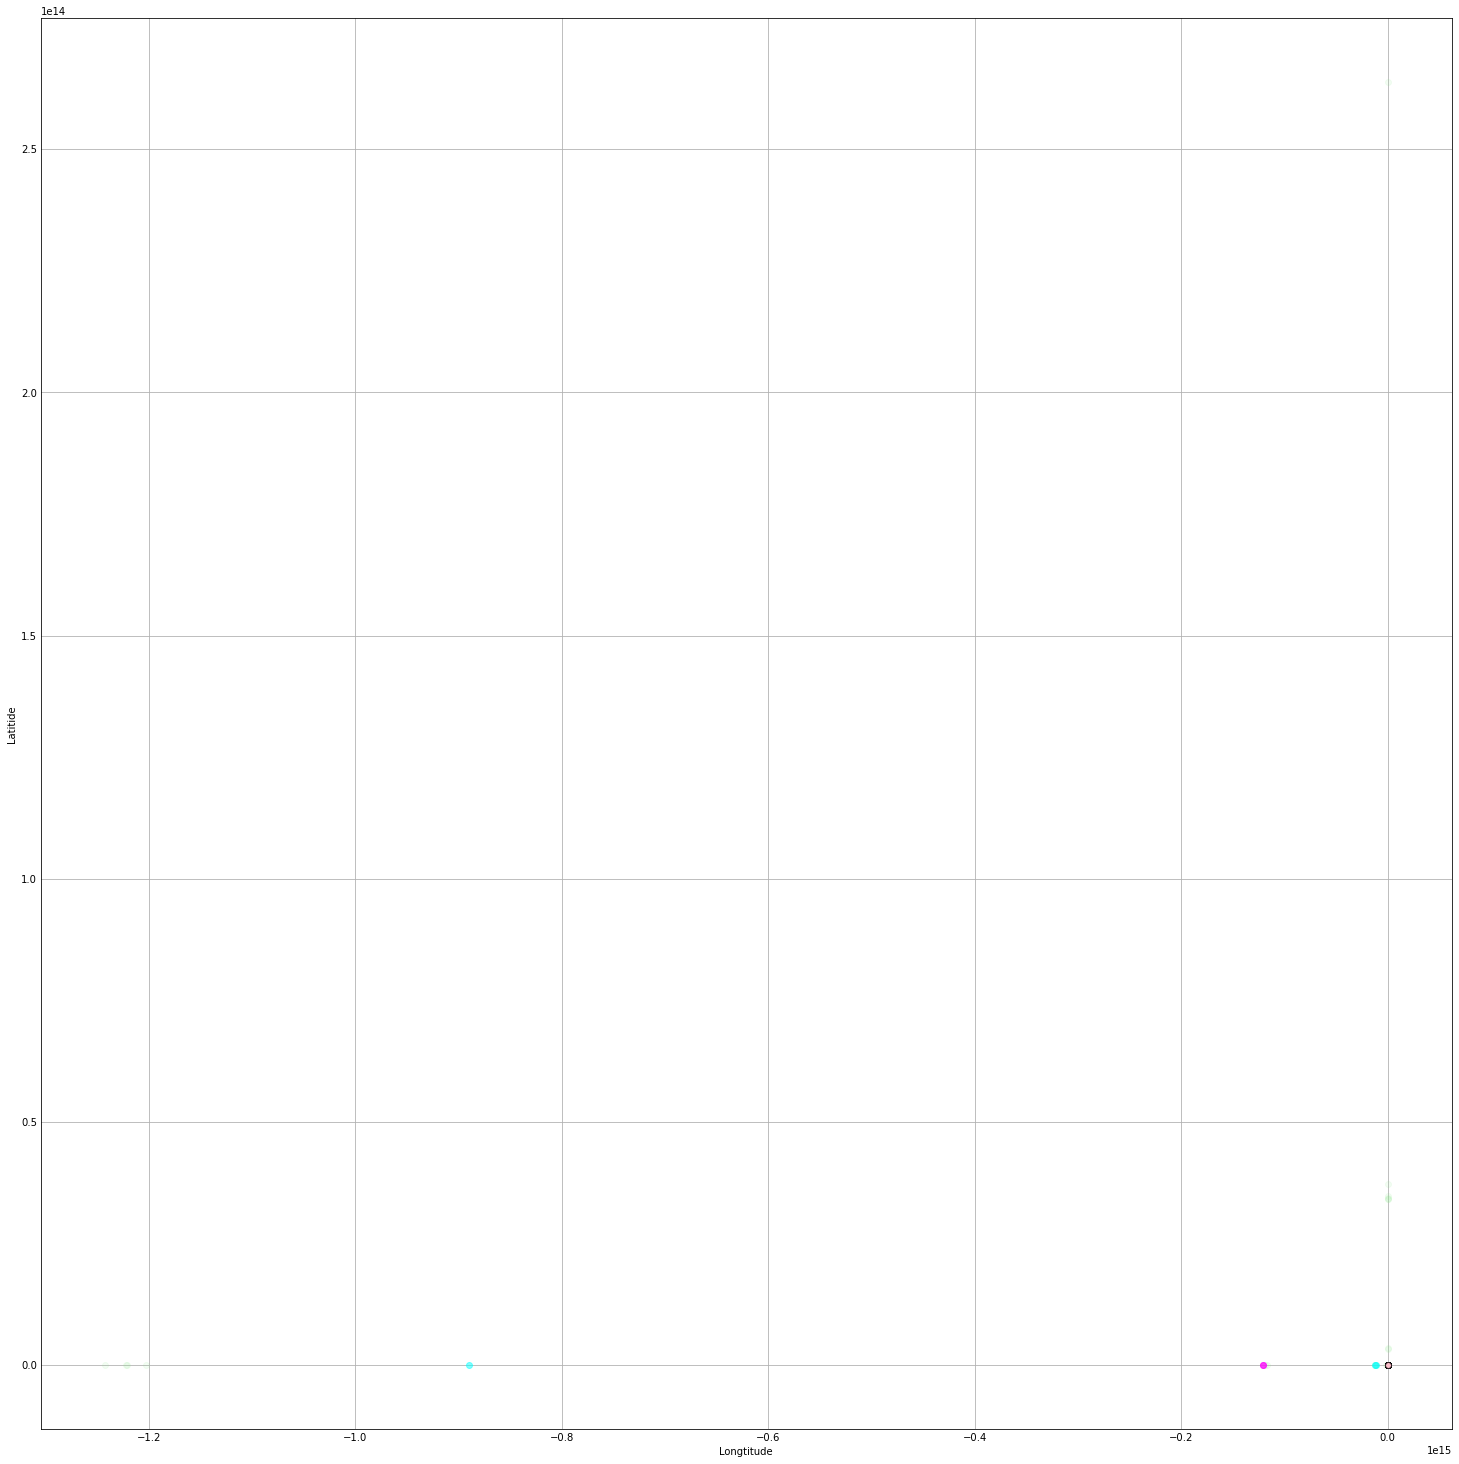

In [20]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("Longtitude")
plt.ylabel("Latitide")
#ax.scatter(cols_compare['Longitude']['distilgpt2'], cols_compare['Latitude']['distilgpt2'],c='lightblue', label='distilgpt2', alpha=0.5, edgecolors='lightblue')
ax.scatter(cols_compare['Longitude']['gpt2xl'], cols_compare['Latitude']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
ax.scatter(cols_compare['Longitude']['cerebras'], cols_compare['Latitude']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(cols_compare['Longitude']['phi'], cols_compare['Latitude']['phi'],c='magenta', label='phi', alpha=0.5, edgecolors='magenta')

ax.scatter(cols_compare['Longitude']['real'], cols_compare['Latitude']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')

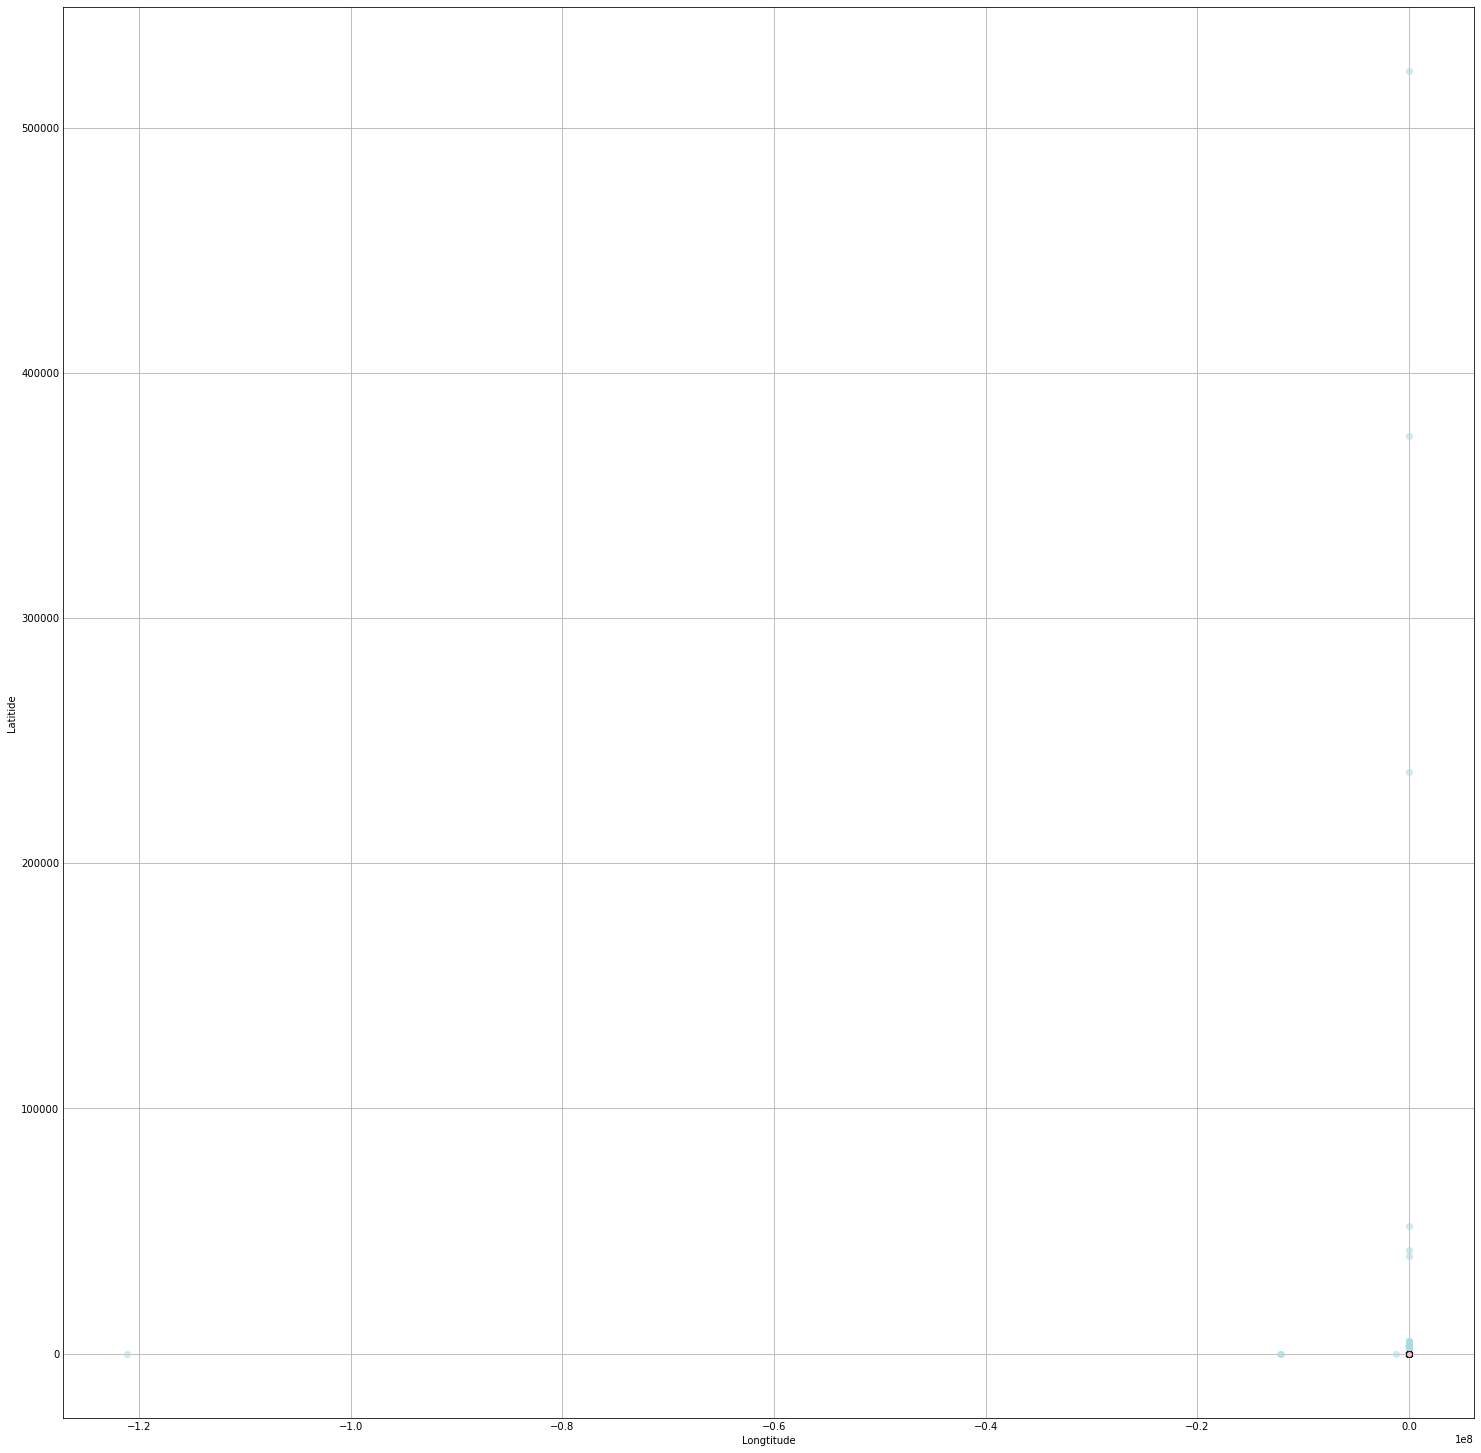

In [21]:
#outliers for distilgpt2 
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("Longtitude")
plt.ylabel("Latitide")
ax.scatter(cols_compare['Longitude']['distilgpt2'], cols_compare['Latitude']['distilgpt2'],c='lightblue', label='distilgpt2', alpha=0.5, edgecolors='lightblue')
ax.scatter(cols_compare['Longitude']['real'], cols_compare['Latitude']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')

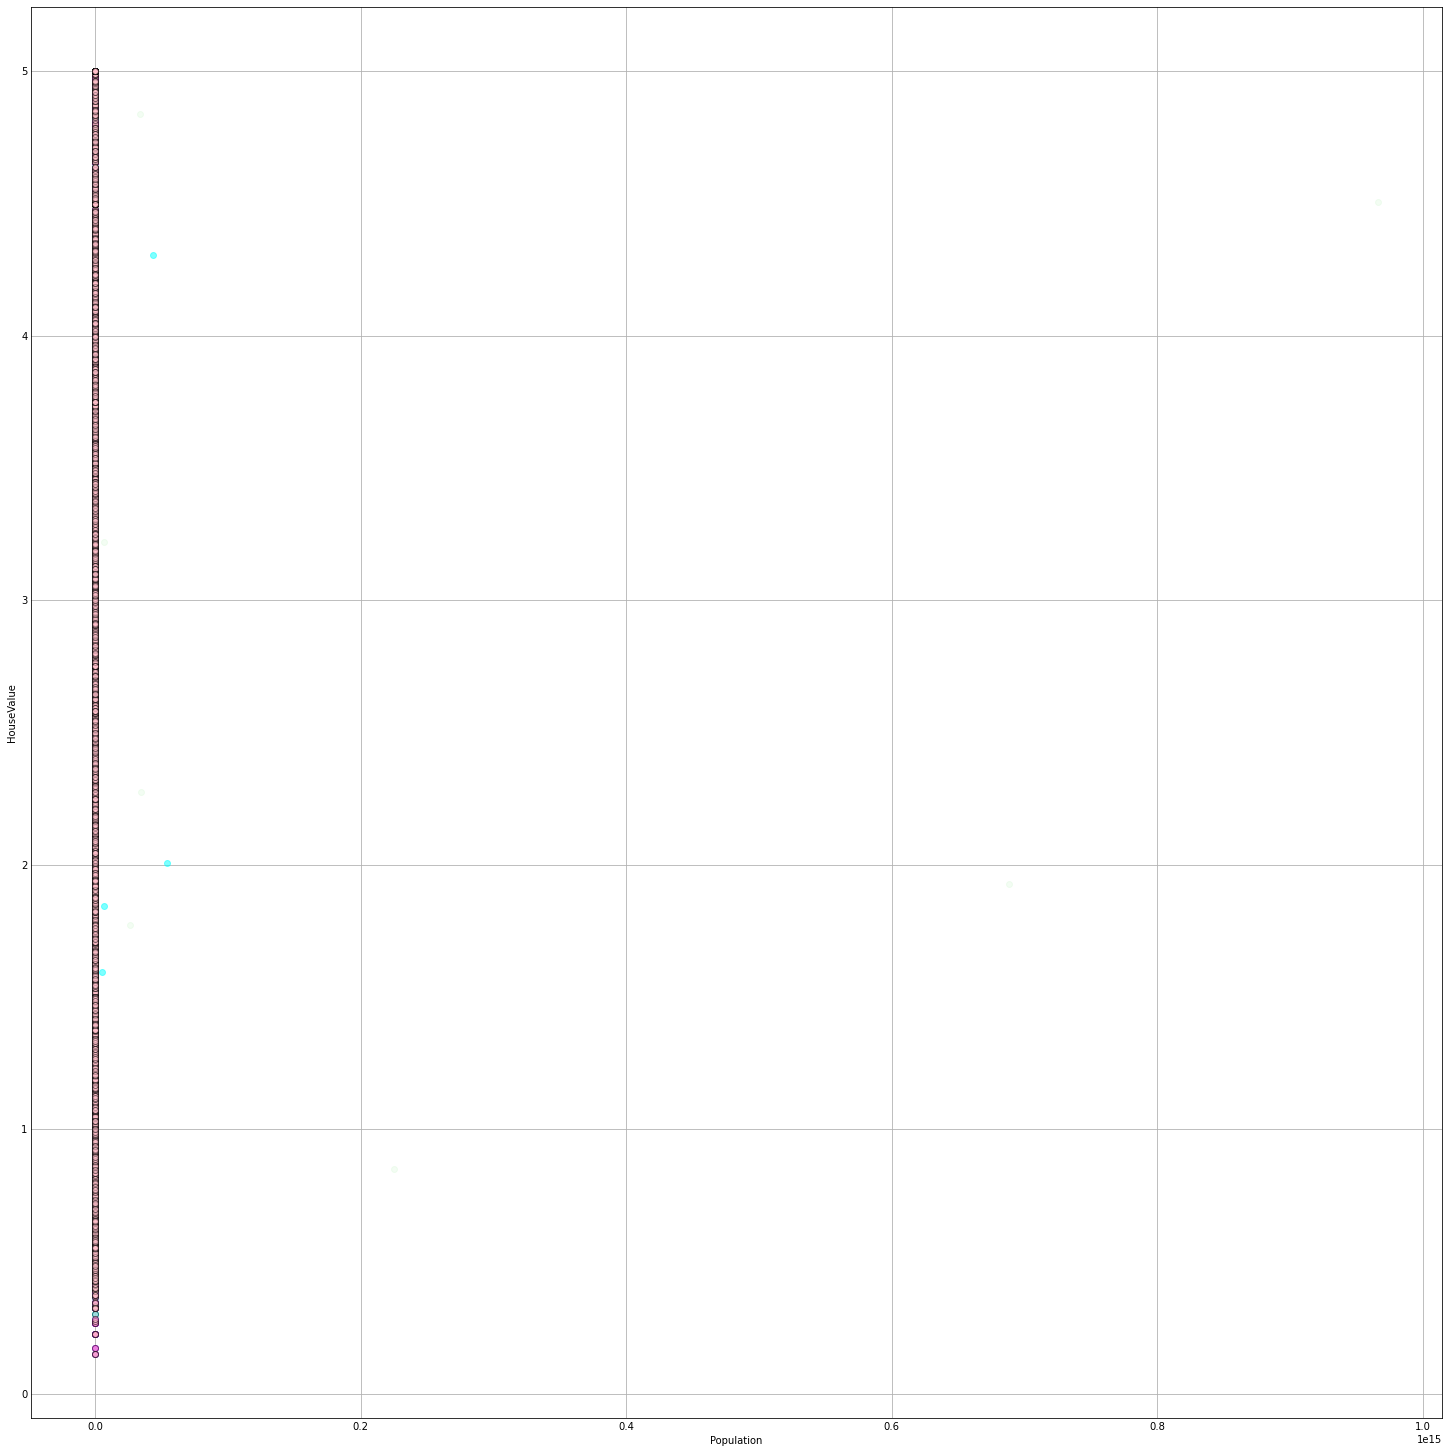

In [22]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("Population")
plt.ylabel("HouseValue")
#ax.scatter(cols_compare['Longitude']['real'], cols_compare['Latitude']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')
#ax.scatter(cols_compare['Population']['distilgpt2'], cols_compare['MedHouseVal']['distilgpt2'],c='lightblue', label='distilgpt2', alpha=0.5, edgecolors='lightblue')
ax.scatter(cols_compare['Population']['gpt2xl'], cols_compare['MedHouseVal']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
ax.scatter(cols_compare['Population']['cerebras'], cols_compare['MedHouseVal']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(cols_compare['Population']['phi'], cols_compare['MedHouseVal']['phi'],c='magenta', label='phi', alpha=0.5, edgecolors='magenta')
ax.scatter(cols_compare['Population']['real'], cols_compare['MedHouseVal']['real'],c='pink', label='real', alpha=0.5, edgecolors='black')

# Regression task on rough data

In [23]:
y1 = real_data['MedHouseVal']
X1 = real_data.drop("MedHouseVal", axis=1)
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X1, y1, test_size=0.2, random_state=random_state)

In [24]:
# define column transformer 
col_transformer = ColumnTransformer([
    ("num_col_transformer", StandardScaler(), ['MedInc','HouseAge','AveRooms','AveBedrms','Population','AveOccup','Latitude','Longitude']),
],remainder='passthrough')


# define a Pipeline with 2 steps: 1. transform columns; 2. Apply the model
model = Pipeline([
    ("col_transformer", col_transformer),
    ("estimator", LinearRegression())
]
)

In [25]:
regression_pipe = Pipeline([
    ('Scaler', StandardScaler()),
    ('LR', Ridge())
])

reg_parameters = {
    'LR__solver': ['saga', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs'],
    'LR__alpha': [0.001, 0.01, 0.1, 1, 10],
}


## Real data regression

In [26]:
X_tr1, X_te1, y_tr1, y_te1 = train_test_split(X1, y1, test_size=0.2, random_state=random_state)

In [27]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr1, y_tr1)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.772 total time=   0.2s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.712 total time=   0.2s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.050 total time=   0.2s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.709 total time=   0.2s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-0.740 total time=   0.2s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.772 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.712 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.050 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.709 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-0.740 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-0.772 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cho

[CV 2/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.712 total time=   0.0s
[CV 3/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-1.050 total time=   0.0s
[CV 4/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.709 total time=   0.0s
[CV 5/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-0.740 total time=   0.0s
[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.772 total time=   0.0s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.712 total time=   0.0s
[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.050 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.709 total time=   0.0s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-0.740 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.772 total time=   0.1s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-0.712 total time=   0.1s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.050 total time=   0.1s
[CV 4/5] END ...LR__

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('Scaler', StandardScaler()),
                                       ('LR', Ridge())]),
             param_grid={'LR__alpha': [0.001, 0.01, 0.1, 1, 10],
                         'LR__solver': ['saga', 'svd', 'cholesky', 'lsqr',
                                        'sparse_cg', 'sag', 'saga', 'lbfgs']},
             scoring='neg_root_mean_squared_error', verbose=3)

In [28]:
print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

-0.7963941997179204
Ridge(alpha=1, solver='svd')


In [29]:
y_tr_pr1 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr1 = mean_squared_error(y_tr1,y_tr_pr1, squared=True)
y_te_pr1 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te1 = mean_squared_error(y_te1,y_te_pr1, squared=True)

In [30]:
print('LR model real data: RMSE train =',mse_tr1,', RMSE test',mse_te1)

LR model real data: RMSE train = 0.520362665148444 , RMSE test 0.5274764719545153


In [31]:
model_results = pd.DataFrame(columns=['Model','Dataset','RMSE'])
res_test = pd.DataFrame([['Real data','Real test',
                        mse_te1]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

C:\Users\AlexeyNeyman\AppData\Local\Temp\ipykernel_8792\3798510043.py:6: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  model_results = pd.concat([model_results, res_test],axis=0)


## DistillGPT2 regression

In [32]:
y2 = synt_data_distilgpt2['MedHouseVal']
X2 = synt_data_distilgpt2.drop("MedHouseVal", axis=1)
X_tr2, X_te2, y_tr2, y_te2 = train_test_split(X2, y2, test_size=0.2, random_state=random_state)

In [33]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr2, y_tr2)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END ....LR__alpha=0.001, LR__solver=saga;, score=nan total time=   0.0s
[CV 2/5] END ....LR__alpha=0.001, LR__solver=saga;, score=nan total time=   0.0s
[CV 3/5] END ....LR__alpha=0.001, LR__solver=saga;, score=nan total time=   0.0s
[CV 4/5] END ....LR__alpha=0.001, LR__solver=saga;, score=nan total time=   0.0s
[CV 5/5] END ....LR__alpha=0.001, LR__solver=saga;, score=nan total time=   0.0s
[CV 1/5] END .....LR__alpha=0.001, LR__solver=svd;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.001, LR__solver=svd;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=0.001, LR__solver=svd;, score=nan total time=   0.0s
[CV 4/5] END .....LR__alpha=0.001, LR__solver=svd;, score=nan total time=   0.0s


C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 5/5] END .....LR__alpha=0.001, LR__solver=svd;, score=nan total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 3/5] END LR__alpha=0.001, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 4/5] END LR__alpha=0.001, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 5/5] END LR__alpha=0.001, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 1/5] END ....LR__alpha=0.001, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 2/5] END ....LR__alpha=0.001, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 3/5] END ....LR__alpha=0.001, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 4/5] END ....LR__alpha=0.001, LR__solver=lsqr;, score=nan total time=   0.0s


C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 5/5] END ....LR__alpha=0.001, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 3/5] END LR__alpha=0.001, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 4/5] END LR__alpha=0.001, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 5/5] END LR__alpha=0.001, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 1/5] END .....LR__alpha=0.001, LR__solver=sag;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.001, LR__solver=sag;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=0.001, LR__solver=sag;, score=nan total time=   0.0s
[CV 4/5] END .....LR__alpha=0.001, LR__solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .....LR__alpha=0.001, LR__solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ....LR__alpha=0.001, LR__solver=saga;, score=nan total time=   0.0s
[CV 2/5] END ....LR__al

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 5/5] END ....LR__alpha=0.001, LR__solver=saga;, score=nan total time=   0.0s
[CV 1/5] END ...LR__alpha=0.001, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ...LR__alpha=0.001, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ...LR__alpha=0.001, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ...LR__alpha=0.001, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ...LR__alpha=0.001, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s
[CV 4/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s
[CV 5/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s
[CV 1/5] END ......LR__alpha=0.01, LR__solver=svd;, score=nan total time=   0.0s
[CV 2/5] END ......LR__alpha

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 5/5] END .....LR__alpha=0.01, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 1/5] END LR__alpha=0.01, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 2/5] END LR__alpha=0.01, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 3/5] END LR__alpha=0.01, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 4/5] END LR__alpha=0.01, LR__solver=sparse_cg;, score=nan total time=   0.0s


C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 5/5] END LR__alpha=0.01, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 1/5] END ......LR__alpha=0.01, LR__solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ......LR__alpha=0.01, LR__solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ......LR__alpha=0.01, LR__solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ......LR__alpha=0.01, LR__solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ......LR__alpha=0.01, LR__solver=sag;, score=nan total time=   0.0s
[CV 1/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s
[CV 4/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s


C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 5/5] END .....LR__alpha=0.01, LR__solver=saga;, score=nan total time=   0.0s
[CV 1/5] END ....LR__alpha=0.01, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....LR__alpha=0.01, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END ....LR__alpha=0.01, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END ....LR__alpha=0.01, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END ....LR__alpha=0.01, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s


C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 2/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s
[CV 3/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s
[CV 4/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s
[CV 5/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s
[CV 1/5] END .......LR__alpha=0.1, LR__solver=svd;, score=nan total time=   0.0s
[CV 2/5] END .......LR__alpha=0.1, LR__solver=svd;, score=nan total time=   0.0s
[CV 3/5] END .......LR__alpha=0.1, LR__solver=svd;, score=nan total time=   0.0s
[CV 4/5] END .......LR__alpha=0.1, LR__solver=svd;, score=nan total time=   0.0s
[CV 5/5] END .......LR__alpha=0.1, LR__solver=svd;, score=nan total time=   0.0s
[CV 1/5] END ..LR__alpha=0.1, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 2/5] END ..LR__alpha=0.1, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 3/5] END ..LR__alpha=0.1, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 4/5] END ..LR__alpha=0.1

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 4/5] END .......LR__alpha=0.1, LR__solver=sag;, score=nan total time=   0.0s
[CV 5/5] END .......LR__alpha=0.1, LR__solver=sag;, score=nan total time=   0.0s
[CV 1/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s
[CV 2/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s
[CV 3/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s
[CV 4/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s
[CV 5/5] END ......LR__alpha=0.1, LR__solver=saga;, score=nan total time=   0.0s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END ........LR__alp

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 4/5] END ........LR__alpha=1, LR__solver=saga;, score=nan total time=   0.0s
[CV 5/5] END ........LR__alpha=1, LR__solver=saga;, score=nan total time=   0.0s
[CV 1/5] END .........LR__alpha=1, LR__solver=svd;, score=nan total time=   0.0s
[CV 2/5] END .........LR__alpha=1, LR__solver=svd;, score=nan total time=   0.0s


C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 3/5] END .........LR__alpha=1, LR__solver=svd;, score=nan total time=   0.0s
[CV 4/5] END .........LR__alpha=1, LR__solver=svd;, score=nan total time=   0.0s
[CV 5/5] END .........LR__alpha=1, LR__solver=svd;, score=nan total time=   0.0s
[CV 1/5] END ....LR__alpha=1, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 2/5] END ....LR__alpha=1, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 3/5] END ....LR__alpha=1, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 4/5] END ....LR__alpha=1, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 5/5] END ....LR__alpha=1, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 1/5] END ........LR__alpha=1, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 2/5] END ........LR__alpha=1, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 3/5] END ........LR__alpha=1, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 4/5] END ........LR__alpha=1, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 5/5] END ........LR__alp

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 4/5] END ........LR__alpha=1, LR__solver=saga;, score=nan total time=   0.0s
[CV 5/5] END ........LR__alpha=1, LR__solver=saga;, score=nan total time=   0.0s
[CV 1/5] END .......LR__alpha=1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......LR__alpha=1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......LR__alpha=1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......LR__alpha=1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 5/5] END .......LR__alpha=1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 1/5] END .......LR__alpha=10, LR__solver=saga;, score=nan total time=   0.0s
[CV 2/5] END .......LR__alpha=10, LR__solver=saga;, score=nan total time=   0.0s
[CV 3/5] END .......LR__alpha=10, LR__solver=saga;, score=nan total time=   0.0s
[CV 4/5] END .......LR__alpha=10, LR__solver=saga;, score=nan total time=   0.0s
[CV 5/5] END .......LR__alpha=10, LR__solver=saga;, score=nan total time=   0.0s
[CV 1/5] END ........LR__alp

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 5/5] END ...LR__alpha=10, LR__solver=cholesky;, score=nan total time=   0.0s
[CV 1/5] END .......LR__alpha=10, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 2/5] END .......LR__alpha=10, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 3/5] END .......LR__alpha=10, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 4/5] END .......LR__alpha=10, LR__solver=lsqr;, score=nan total time=   0.0s
[CV 5/5] END .......LR__alpha=10, LR__solver=lsqr;, score=nan total time=   0.0s


C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

[CV 1/5] END ..LR__alpha=10, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 2/5] END ..LR__alpha=10, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 3/5] END ..LR__alpha=10, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 4/5] END ..LR__alpha=10, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 5/5] END ..LR__alpha=10, LR__solver=sparse_cg;, score=nan total time=   0.0s
[CV 1/5] END ........LR__alpha=10, LR__solver=sag;, score=nan total time=   0.0s
[CV 2/5] END ........LR__alpha=10, LR__solver=sag;, score=nan total time=   0.0s
[CV 3/5] END ........LR__alpha=10, LR__solver=sag;, score=nan total time=   0.0s
[CV 4/5] END ........LR__alpha=10, LR__solver=sag;, score=nan total time=   0.0s
[CV 5/5] END ........LR__alpha=10, LR__solver=sag;, score=nan total time=   0.0s
[CV 1/5] END .......LR__alpha=10, LR__solver=saga;, score=nan total time=   0.0s
[CV 2/5] END .......LR__alpha=10, LR__solver=saga;, score=nan total time=   0.0s
[CV 3/5] END .......LR__alph

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Conda\lib\site-packages\sklearn\metrics\_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "C:\Conda\lib\site-packages\sklearn\utils\_response.py", line 218, in _get_response_values
    y_pred, pos_label = estimator.predict(X), None
  File "C:\Conda\lib\site-packages\sklearn\pipeli

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [34]:
y_tr_pr2 = grid_pipe_log.best_estimator_.predict(X_tr2)
mse_tr2 = mean_squared_error(y_tr2,y_tr_pr2, squared=True)
y_te_pr2 = grid_pipe_log.best_estimator_.predict(X_te2)
mse_te2 = mean_squared_error(y_te2,y_te_pr2, squared=True)
y_tr_pr12 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr12 = mean_squared_error(y_tr1,y_tr_pr12,squared=False)
y_te_pr12 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te12 = mean_squared_error(y_te1,y_te_pr12,squared=False)

ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
print('LR model Distilled GPT syntetic data: MSE train =',mse_tr2,', MSE test',mse_te2)
print('LR model Distilled GPT syntetic data: MSE from real train data =',mse_tr12,', MSE from real test data',mse_te12)

In [ ]:
res_test = pd.DataFrame([['Distilled GPT','Synth test',
                        mse_te2],['Distilled GPT','Real test',
                        mse_te12]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## GPT2XL regression

In [35]:
y3 = synt_data_gpt2xl['MedHouseVal']
X3 = synt_data_gpt2xl.drop("MedHouseVal", axis=1)
X_tr3, X_te3, y_tr3, y_te3 = train_test_split(X3, y3, test_size=0.2, random_state=random_state)

In [36]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr3, y_tr3)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.148 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.152 total time=   0.0s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.180 total time=   0.0s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.173 total time=   0.0s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.152 total time=   0.0s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.148 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.152 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.180 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.173 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.152 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-1.148 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cho

[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.152 total time=   0.0s
[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.180 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.173 total time=   0.0s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.152 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.148 total time=   0.0s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.152 total time=   0.0s
[CV 3/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.180 total time=   0.0s
[CV 4/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.173 total time=   0.0s
[CV 5/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.152 total time=   0.0s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .....LR__alpha=

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

In [37]:
y_tr_pr3 = grid_pipe_log.best_estimator_.predict(X_tr3)
mse_tr3 = mean_squared_error(y_tr3,y_tr_pr3, squared=True)
y_te_pr3 = grid_pipe_log.best_estimator_.predict(X_te3)
mse_te3 = mean_squared_error(y_te3,y_te_pr3, squared=True)
y_tr_pr13 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr13 = mean_squared_error(y_tr1,y_tr_pr13,squared=False)
y_te_pr13 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te13 = mean_squared_error(y_te1,y_te_pr13,squared=False)

In [38]:
print('LR model GPT2XL syntetic data: MSE train =',mse_tr3,', MSE test',mse_te3)
print('LR model GPT2XL syntetic data: MSE from real train data =',mse_tr13,', MSE from real test data',mse_te13)

LR model GPT2XL syntetic data: MSE train = 1.3454531712963378 , MSE test 1.3410221833038019
LR model GPT2XL syntetic data: MSE from real train data = 1.1519457036373508 , MSE from real test data 1.1370269251116736


In [39]:
res_test = pd.DataFrame([['GPT2XL','Synth test',
                        mse_te3],['GPT2XL','Real test',
                        mse_te13]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## Cerebras regression

In [40]:
y4 = synt_data_cerebras['MedHouseVal']
X4 = synt_data_cerebras.drop("MedHouseVal", axis=1)
X_tr4, X_te4, y_tr4, y_te4 = train_test_split(X4, y4, test_size=0.2, random_state=random_state)

In [41]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr4, y_tr4)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.140 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.151 total time=   0.0s
[CV 3/5] END LR__alpha=0.001, LR__solver=saga;, score=-431.157 total time=   0.0s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.159 total time=   0.0s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.132 total time=   0.0s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.140 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.151 total time=   0.0s
[CV 3/5] END LR__alpha=0.001, LR__solver=svd;, score=-431.161 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.159 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.132 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-1.140 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=ch

[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.140 total time=   0.0s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.151 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.1, LR__solver=sag;, score=-431.156 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.159 total time=   0.0s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.132 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.140 total time=   0.0s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.151 total time=   0.0s
[CV 3/5] END .LR__alpha=0.1, LR__solver=saga;, score=-431.083 total time=   0.0s
[CV 4/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.159 total time=   0.0s
[CV 5/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.132 total time=   0.0s
[CV 1/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....LR__alpha=0.1, LR__solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....LR__alpha=

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

In [42]:
y_tr_pr4 = grid_pipe_log.best_estimator_.predict(X_tr4)
mse_tr4 = mean_squared_error(y_tr4,y_tr_pr4, squared=True)
y_te_pr4 = grid_pipe_log.best_estimator_.predict(X_te4)
mse_te4 = mean_squared_error(y_te4,y_te_pr4, squared=True)
y_tr_pr14 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr14 = mean_squared_error(y_tr1,y_tr_pr14,squared=False)
y_te_pr14 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te14 = mean_squared_error(y_te1,y_te_pr14,squared=False)

In [43]:
print('LR model Cerebras syntetic data: MSE train =',mse_tr4,', MSE test',mse_te4)
print('LR model Cerebras syntetic data: MSE from real train data =',mse_tr14,', MSE from real test data',mse_te14)

LR model Cerebras syntetic data: MSE train = 1.310214477837447 , MSE test 1.4329020365063665
LR model Cerebras syntetic data: MSE from real train data = 1.151972276290472 , MSE from real test data 1.1372728715279026


In [44]:
res_test = pd.DataFrame([['Cerebras','Synth test',
                        mse_te4],['Cerebras','Real test',
                        mse_te14]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## Phi1.5 regression

In [45]:
y5 = synt_data_phi['MedHouseVal']
X5 = synt_data_phi.drop("MedHouseVal", axis=1)
X_tr5, X_te5, y_tr5, y_te5 = train_test_split(X5, y5, test_size=0.2, random_state=random_state)

In [46]:
%%time
grid_pipe_log = GridSearchCV(regression_pipe, reg_parameters, cv=5, scoring='neg_root_mean_squared_error', verbose=3)
grid_pipe_log.fit(X_tr5, y_tr5)

print(grid_pipe_log.best_score_)
print(grid_pipe_log.best_estimator_.steps[1][1])

Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV 1/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.166 total time=   0.0s
[CV 2/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.144 total time=   0.0s
[CV 3/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.148 total time=   0.0s
[CV 4/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.160 total time=   0.0s
[CV 5/5] END .LR__alpha=0.001, LR__solver=saga;, score=-1.183 total time=   0.0s
[CV 1/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.166 total time=   0.0s
[CV 2/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.144 total time=   0.0s
[CV 3/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.148 total time=   0.0s
[CV 4/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.160 total time=   0.0s
[CV 5/5] END ..LR__alpha=0.001, LR__solver=svd;, score=-1.183 total time=   0.0s
[CV 1/5] END LR__alpha=0.001, LR__solver=cholesky;, score=-1.166 total time=   0.0s
[CV 2/5] END LR__alpha=0.001, LR__solver=cho

[CV 1/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-1.166 total time=   0.0s
[CV 2/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-1.144 total time=   0.0s
[CV 3/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-1.148 total time=   0.0s
[CV 4/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-1.160 total time=   0.0s
[CV 5/5] END LR__alpha=0.1, LR__solver=sparse_cg;, score=-1.183 total time=   0.0s
[CV 1/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.166 total time=   0.0s
[CV 2/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.144 total time=   0.0s
[CV 3/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.148 total time=   0.0s
[CV 4/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.160 total time=   0.0s
[CV 5/5] END ....LR__alpha=0.1, LR__solver=sag;, score=-1.183 total time=   0.0s
[CV 1/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.166 total time=   0.0s
[CV 2/5] END ...LR__alpha=0.1, LR__solver=saga;, score=-1.144 total time=   0.0s
[CV 3/5] END ...LR

C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
25 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Conda\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Conda\lib\site-packages\sklearn\pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Conda\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    re

In [47]:
y_tr_pr5 = grid_pipe_log.best_estimator_.predict(X_tr5)
mse_tr5 = mean_squared_error(y_tr5,y_tr_pr5, squared=True)
y_te_pr5 = grid_pipe_log.best_estimator_.predict(X_te5)
mse_te5 = mean_squared_error(y_te5,y_te_pr5, squared=True)
y_tr_pr15 = grid_pipe_log.best_estimator_.predict(X_tr1)
mse_tr15 = mean_squared_error(y_tr1,y_tr_pr15,squared=False)
y_te_pr15 = grid_pipe_log.best_estimator_.predict(X_te1)
mse_te15 = mean_squared_error(y_te1,y_te_pr15,squared=False)

In [48]:
print('LR model Phi15 syntetic data: MSE train =',mse_tr5,', MSE test',mse_te5)
print('LR model Phi15 syntetic data: MSE from real train data =',mse_tr15,', MSE from real test data',mse_te15)

LR model Phi15 syntetic data: MSE train = 1.3254760455174912 , MSE test 1891224065413.155
LR model Phi15 syntetic data: MSE from real train data = 1.1517863541044995 , MSE from real test data 1.1370359245444275


In [49]:
res_test = pd.DataFrame([['Phi15','Synth test',
                        mse_te5],['Phi15','Real test',
                        mse_te15]],
                        columns=['Model','Dataset','RMSE'])

model_results = pd.concat([model_results, res_test],axis=0)

## Modelling results 

In [50]:
model_results

,Model,Dataset,RMSE
0,Real data,Real test,5.274765e-01
0,GPT2XL,Synth test,1.341022e+00
1,GPT2XL,Real test,1.137027e+00
0,Cerebras,Synth test,1.432902e+00
1,Cerebras,Real test,1.137273e+00
0,Phi15,Synth test,1.891224e+12
1,Phi15,Real test,1.137036e+00


In [51]:
model_results.to_csv('model_results_shorthouses_temp1.9.csv')

# Privacy metrics

In [52]:
from pandas import DataFrame, Series
from typing import List, Tuple, Dict, Callable
import scipy.stats as ss
from sklearn.neighbors import NearestNeighbors
from scipy.stats import mannwhitneyu, chisquare, ks_2samp



In [53]:
# bound value to determine quantiles
dcr_quantile = 0.95
# how many bins should be created for privacy histograms
privacy_number_of_bins = 30
#to avoid devision by zero
smoothing_factor = 1e-8
#test sample ratio
ratio = 0.5

random_state = 12*13*99*17-1

In [54]:
tgt_train = real_data
tgt_test = control_dataset

In [55]:
nn_model = NearestNeighbors(metric='minkowski', algorithm="ball_tree",n_jobs=None)
nn_model.fit(tgt_train)

NearestNeighbors(algorithm='ball_tree')

## Real data privacy

In [56]:
tgt_test_neighbors = nn_model.kneighbors(tgt_test, n_neighbors=2)

In [57]:
print('Stats : mean, std, max, min, amount')
dcr_real = tgt_test_neighbors[0][:, 0]
#print('DCR  stats', dcr_real.mean(), dcr_real.std(), dcr_real.max(), dcr_real.min(), len(dcr_real))
dcr2_real = tgt_test_neighbors[0][:, 1]
#print('DCR2 stats', dcr2_real.mean(), dcr2_real.std(), dcr2_real.max(), dcr2_real.min(), len (dcr2_real))
nndr_real = dcr_real / np.maximum(dcr2_real, smoothing_factor)    
print('NNDR stats', nndr_real.mean(), nndr_real.std(), nndr_real.max(), nndr_real.min(), len (nndr_real))
baseline_dcr = dcr_real
bound = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
dcr_real_norm = np.where(dcr_real <= bound, dcr_real / bound, 1)
print('nDCR stats', dcr_real_norm.mean(), dcr_real_norm.std(), dcr_real_norm.max(), dcr_real_norm.min(), len(dcr_real_norm))
print('Bound',bound)

Stats : mean, std, max, min, amount
NNDR stats 0.8049014780886282 0.15945074183200192 0.9999979823195819 0.07821550603275805 4000
nDCR stats 0.49974653137970304 0.20714787051051878 1.0 0.030742811948517867 4000
Bound 7.432462929776719


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for RealData'}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for RealData'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for RealData'}>]],
      dtype=object)

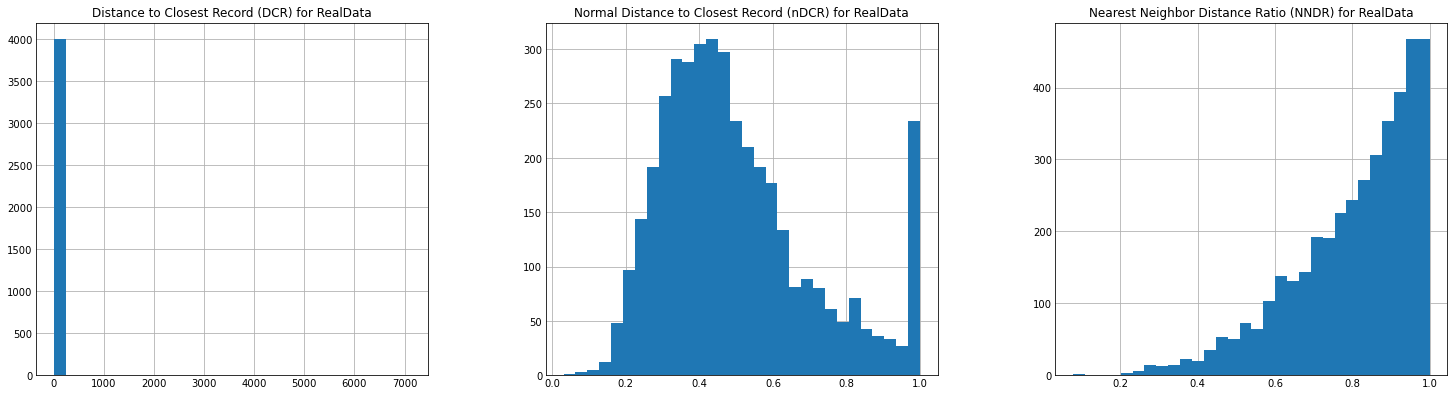

In [58]:
real_privacy = pd.DataFrame(zip(dcr_real,dcr_real_norm,nndr_real),columns=['Distance to Closest Record (DCR) for RealData','Normal Distance to Closest Record (nDCR) for RealData','Nearest Neighbor Distance Ratio (NNDR) for RealData'])
real_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

In [59]:
def calc_dcr_ratio(real_dcr:np.array, synt_dcr:np.array):
    med_real = np.median(real_dcr) 
    ordered_synt = np.sort(synt_dcr)
    middle = len(ordered_synt)//2
    if ordered_synt[middle] <= med_real :
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle+i+1] >= med_real) :
                break
        first_median_synt = middle + i
    else:
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle-i-1] < med_real) :
                break
        first_median_synt = middle - i
    return (len(ordered_synt)-first_median_synt)/max(first_median_synt,smoothing_factor)

In [60]:
def calc_nndr_ratio(real_nndr:np.array, synt_nndr:np.array):
    med_real = np.median(real_nndr) 
    ordered_synt = np.sort(synt_nndr)
    middle = len(ordered_synt)//2
    if ordered_synt[middle] <= med_real :
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle+i+1] >= med_real) :
                break
        first_median_synt = middle + i
    else:
        for i in range(middle) :
            if (i == middle) or (ordered_synt[middle-i-1] < med_real) :
                break
        first_median_synt = middle - i
    return (len(ordered_synt)-first_median_synt)/max(first_median_synt,smoothing_factor)

In [61]:
calc_dcr_ratio(dcr_real_norm,dcr_real_norm.copy())

1.0

In [62]:
calc_nndr_ratio(nndr_real,nndr_real.copy())

1.0

In [63]:
privacy_results = pd.DataFrame(columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

In [64]:
res_privacy = pd.DataFrame([['Real dataset', bound,
                        calc_dcr_ratio(dcr_real_norm,dcr_real_norm.copy()),
                        calc_nndr_ratio(nndr_real,nndr_real.copy()),
                        np.median(dcr_real_norm),
                        np.median(nndr_real),
                        dcr_real_norm.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

C:\Users\AlexeyNeyman\AppData\Local\Temp\ipykernel_8792\106412619.py:9: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  privacy_results = pd.concat([privacy_results, res_privacy],axis=0)


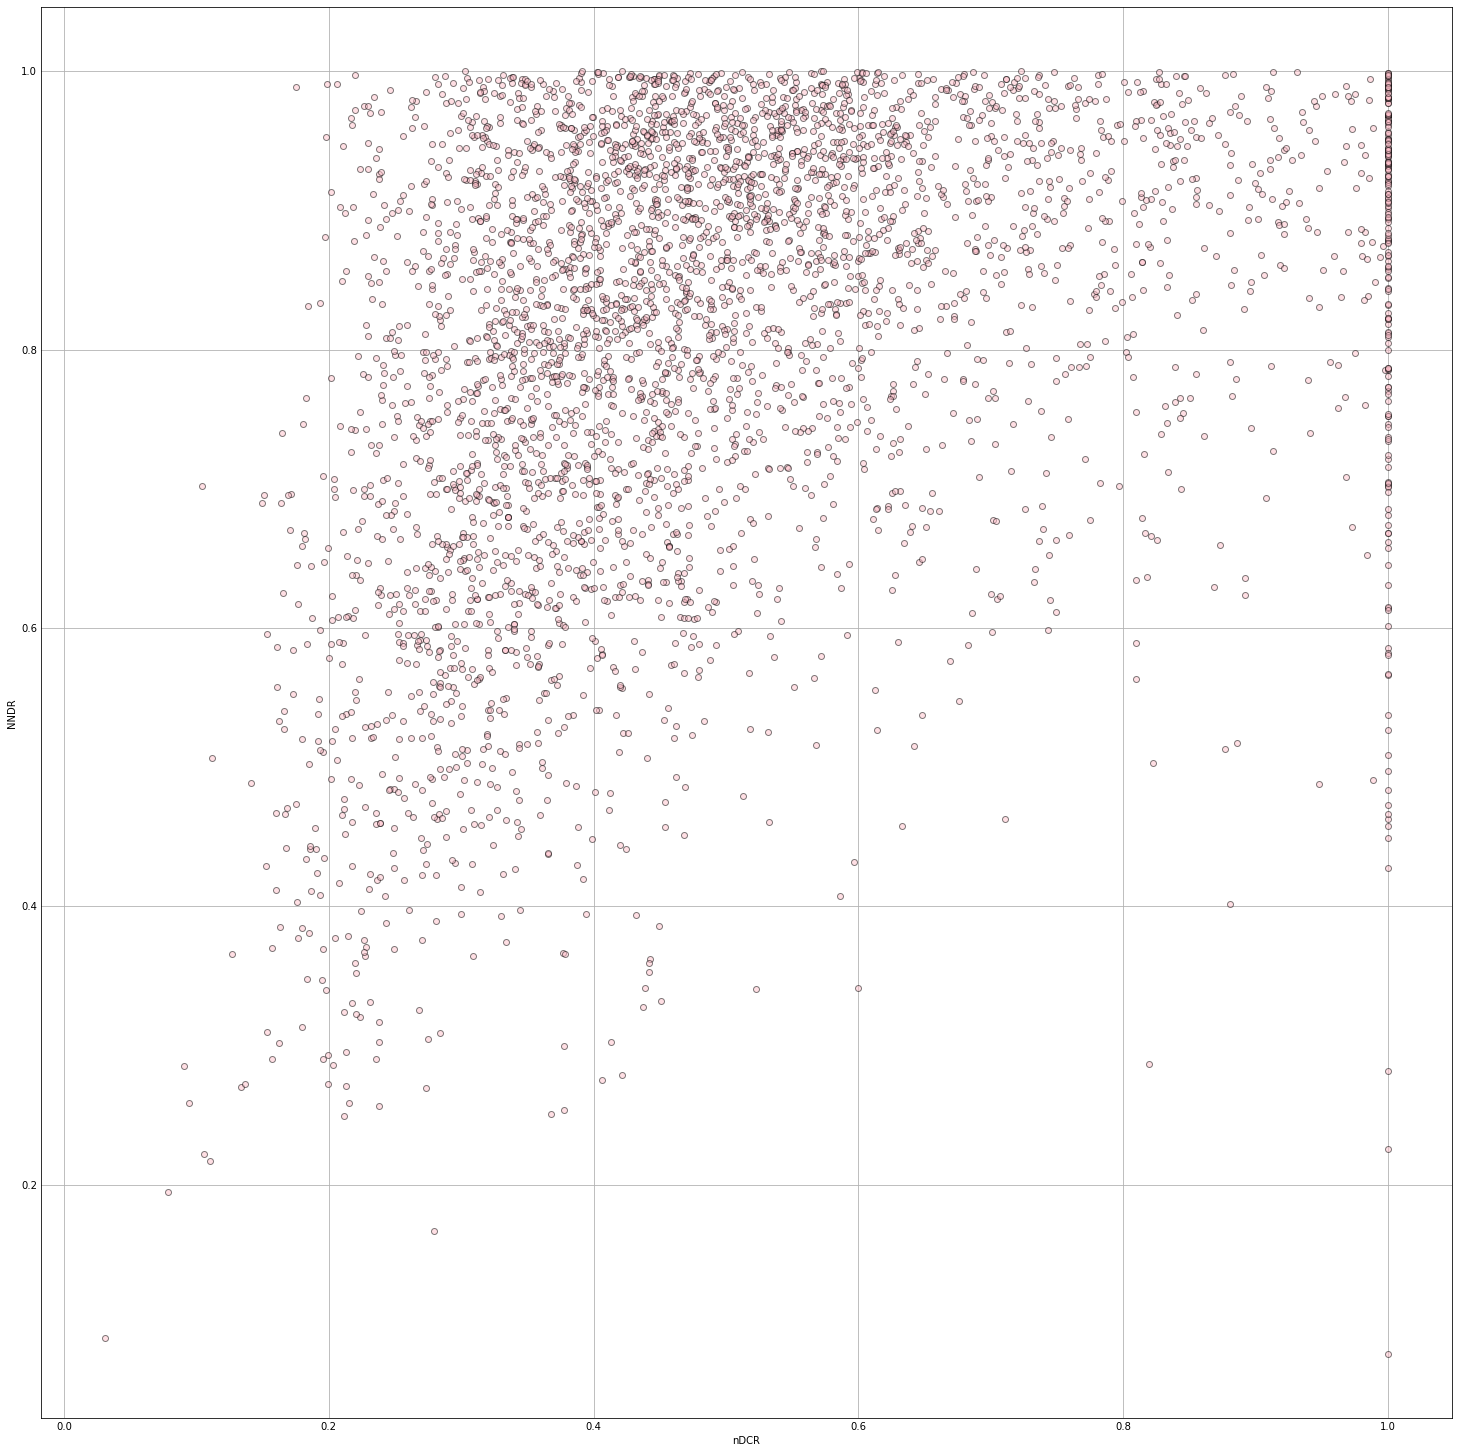

In [104]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
#ax.scatter(cols_compare['Longitude']['gpt2xl'], cols_compare['Latitude']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
#ax.scatter(cols_compare['Longitude']['cerebras'], cols_compare['Latitude']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
#ax.scatter(dcr_synt_norm1, nndr_synt1, c='lightblue', label='DistilledGPT', alpha=0.5, edgecolors='lightblue')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

## DistillGPT2 privacy

In [65]:
syn_test1 = synt_data_distilgpt2.sample(n=4000) 

In [66]:
syn_test_neightbors1 = nn_model.kneighbors(syn_test1, n_neighbors=2)

In [67]:
print('Stats : mean, std, max, min, amount')
dcr_synt1 = syn_test_neightbors1[0][:, 0]
#print('DCR  stats', dcr_synt1.mean(), dcr_synt1.std(), dcr_synt1.max(), dcr_synt1.min(), len (dcr_synt1))
dcr2_synt1 = syn_test_neightbors1[0][:, 1]
#print('DCR2 stats', dcr2_synt1.mean(), dcr2_synt1.std(), dcr2_synt1.max(), dcr2_synt1.min(), len (dcr2_synt1))
nndr_synt1 = dcr_synt1 / np.maximum(dcr2_synt1, smoothing_factor)    
baseline_dcr = dcr_synt1
bound1 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
print('NNDR stats', nndr_synt1.mean(), nndr_synt1.std(), nndr_synt1.max(), nndr_synt1.min(), len (nndr_synt1))
dcr_synt_norm1 = np.where(dcr_synt1 <= bound, dcr_synt1 / bound, 1)
print('nDCR stats', dcr_synt_norm1.mean(), dcr_synt_norm1.std(), dcr_synt_norm1.max(), dcr_synt_norm1.min(), len(dcr_synt_norm1))

Stats : mean, std, max, min, amount
NNDR stats 0.9131764489076517 0.12104428288809138 1.0 0.05323407714769461 4000
nDCR stats 0.856432760485898 0.205261856881004 1.0 0.17851120155553227 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for DistillGPT synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for DistillGPT synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for DistillGPT synthetics'}>]],
      dtype=object)

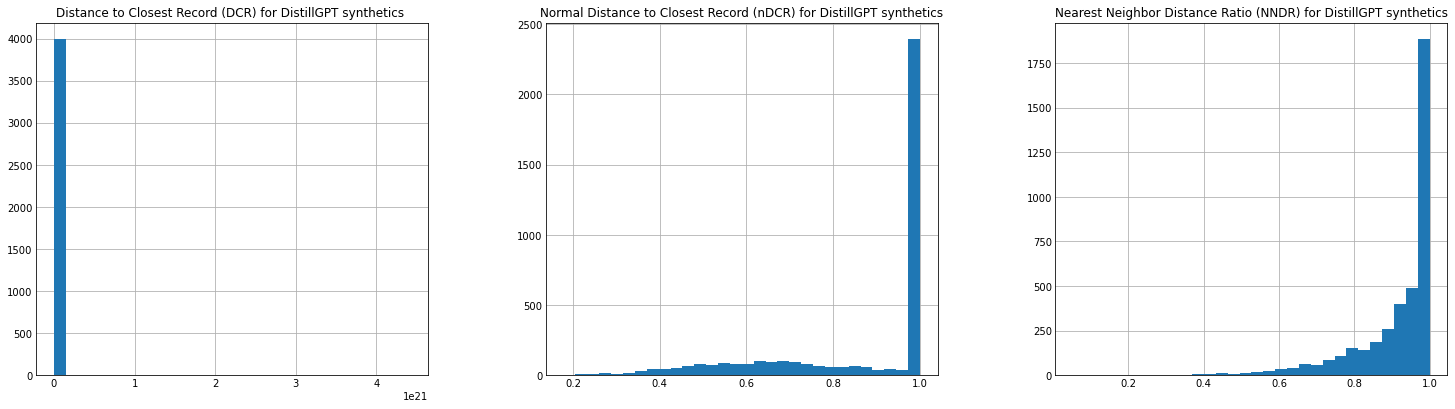

In [68]:
synt_privacy = pd.DataFrame(zip(dcr_synt1,dcr_synt_norm1,nndr_synt1),columns=['Distance to Closest Record (DCR) for DistillGPT synthetics ','Normal Distance to Closest Record (nDCR) for DistillGPT synthetics','Nearest Neighbor Distance Ratio (NNDR) for DistillGPT synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

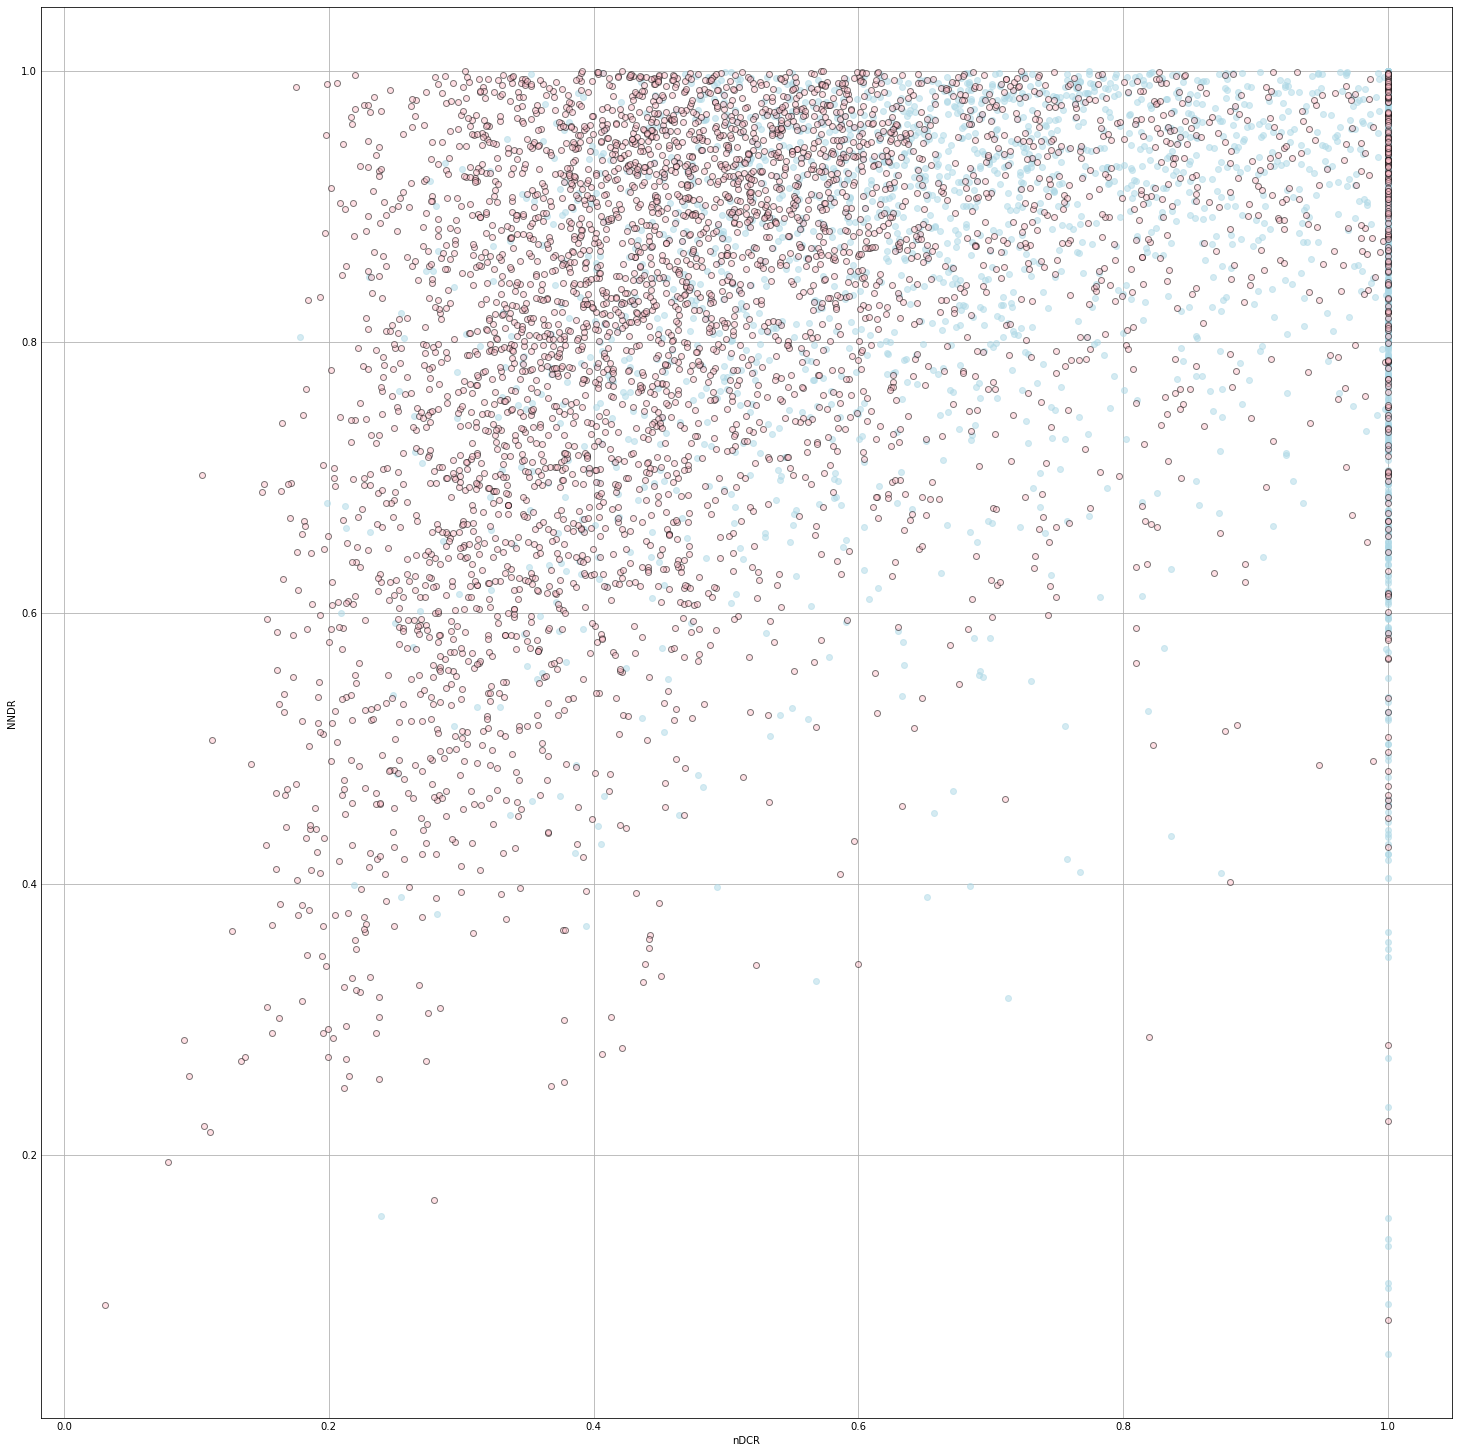

In [69]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
#ax.scatter(cols_compare['Longitude']['gpt2xl'], cols_compare['Latitude']['gpt2xl'],c='lightgreen', label='gpt2xl', alpha=0.1, edgecolors='lightgreen')
#ax.scatter(cols_compare['Longitude']['cerebras'], cols_compare['Latitude']['cerebras'],c='cyan', label='cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(dcr_synt_norm1, nndr_synt1, c='lightblue', label='DistilledGPT', alpha=0.5, edgecolors='lightblue')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [70]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm1)

15.52892561983471

In [71]:
calc_nndr_ratio(nndr_real,nndr_synt1)

3.9875311720698257

In [72]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm1)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt1)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm1)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt1)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=2020459.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=3982606.000000, p-value=0.000000
 Kolmogorov-Smirnov Test for nDCR: statistic=0.60250000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.364500, p-value=0.000000


In [73]:
res_privacy = pd.DataFrame([['Distilled GPT', bound1,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm1),
                        calc_nndr_ratio(nndr_real,nndr_synt1),
                        np.median(dcr_synt_norm1),
                        np.median(nndr_synt1),
                        dcr_synt_norm1.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

## GPT2XL privacy

In [74]:
syn_test2 = synt_data_gpt2xl.sample(n=4000) 

In [75]:
syn_test_neightbors2 = nn_model.kneighbors(syn_test2, n_neighbors=2)

In [76]:
print('Stats : mean, std, max, min, amount')
dcr_synt2 = syn_test_neightbors2[0][:, 0]
dcr2_synt2 = syn_test_neightbors2[0][:, 1]
nndr_synt2 = dcr_synt2 / np.maximum(dcr2_synt2, smoothing_factor)    
baseline_dcr = dcr_synt2
bound2 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
print('NNDR stats', nndr_synt2.mean(), nndr_synt2.std(), nndr_synt2.max(), nndr_synt2.min(), len (nndr_synt2))
dcr_synt_norm2 = np.where(dcr_synt2 <= bound, dcr_synt2 / bound, 1)
print('nDCR stats', dcr_synt_norm2.mean(), dcr_synt_norm2.std(), dcr_synt_norm2.max(), dcr_synt_norm2.min(), len (dcr_synt_norm2))

Stats : mean, std, max, min, amount
NNDR stats 0.8518558955862827 0.1495377429141165 1.0 0.052774038029287394 4000
nDCR stats 0.6923225060586053 0.26103022742406906 1.0 0.08514059302290042 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for GPT2xl synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for GPT2xl synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for GPT2xl synthetics'}>]],
      dtype=object)

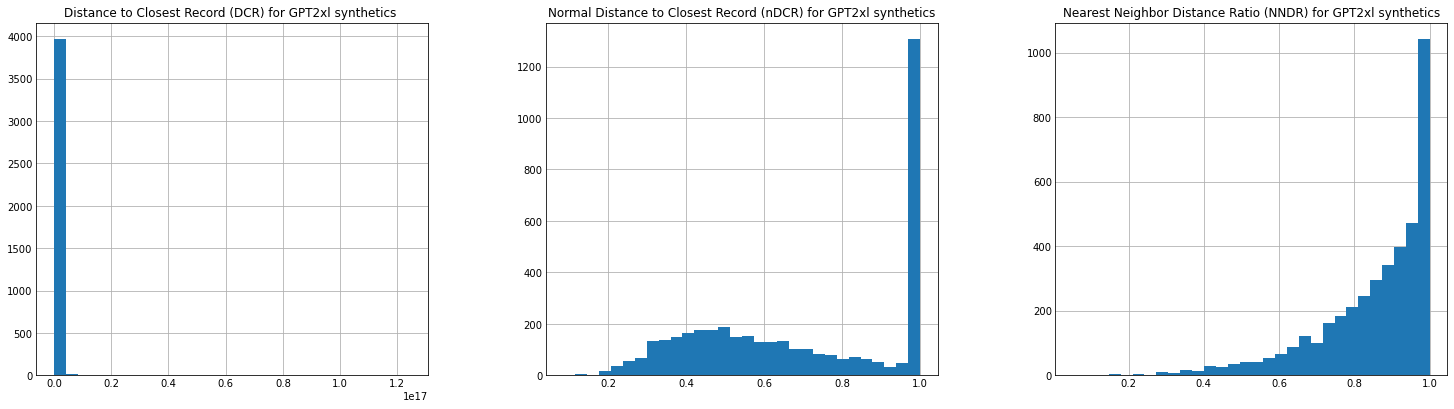

In [77]:
synt_privacy = pd.DataFrame(zip(dcr_synt2,dcr_synt_norm2,nndr_synt2),columns=['Distance to Closest Record (DCR) for GPT2xl synthetics ','Normal Distance to Closest Record (nDCR) for GPT2xl synthetics','Nearest Neighbor Distance Ratio (NNDR) for GPT2xl synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

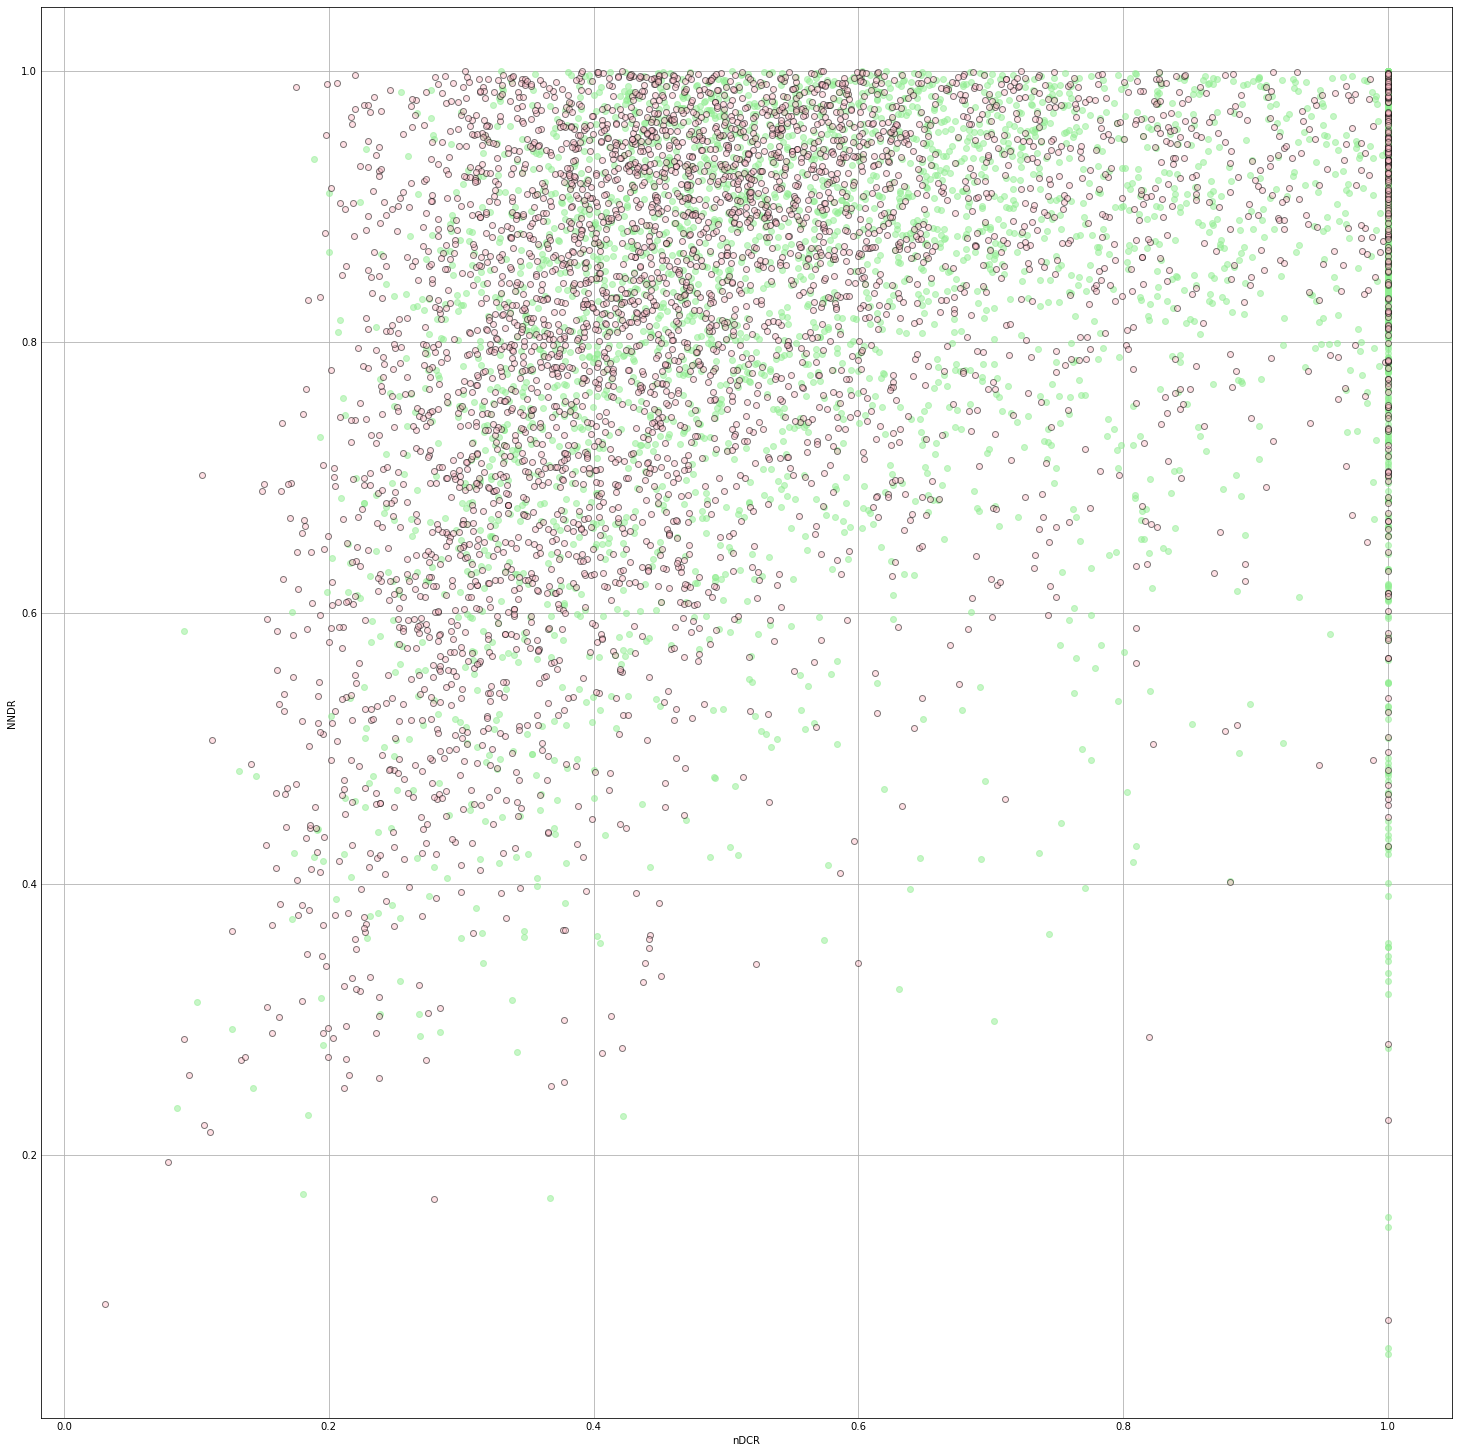

In [78]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm2, nndr_synt2, c='lightgreen', label='GPT2xl', alpha=0.5, edgecolors='lightgreen')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real data', alpha=0.5, edgecolors='black')
plt.show()

In [79]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm2)

3.145077720207254

In [80]:
calc_nndr_ratio(nndr_real,nndr_synt2)

1.7155465037338764

In [81]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm2)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt2)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")
print ('')


print ('')
stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm2)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt2)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=4620259.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=6341943.000000, p-value=0.000000


 Kolmogorov-Smirnov Test for nDCR: statistic=0.32600000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.145250, p-value=0.000000


In [82]:
res_privacy = pd.DataFrame([['GPT2XL', bound2,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm2),
                        calc_nndr_ratio(nndr_real,nndr_synt2),
                        np.median(dcr_synt_norm2),
                        np.median(nndr_synt2),
                        dcr_synt_norm2.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

## Cerebras privacy

In [83]:
syn_test3 = synt_data_cerebras.sample(n=4000)

In [84]:
syn_test_neightbors3 = nn_model.kneighbors(syn_test3, n_neighbors=2)

In [85]:
print('Stats : mean, std, max, min, amount')
dcr_synt3 = syn_test_neightbors3[0][:, 0]
dcr2_synt3 = syn_test_neightbors3[0][:, 1]
baseline_dcr = dcr_synt3
bound3 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
nndr_synt3 = dcr_synt3 / np.maximum(dcr2_synt3, smoothing_factor)    
print('NNDR stats', nndr_synt3.mean(), nndr_synt3.std(), nndr_synt3.max(), nndr_synt3.min(), len (nndr_synt3))
dcr_synt_norm3 = np.where(dcr_synt3 <= bound, dcr_synt3 / bound, 1)
print('nDCR stats', dcr_synt_norm3.mean(), dcr_synt_norm3.std(), dcr_synt_norm3.max(), dcr_synt_norm3.min(), len (dcr_synt_norm3))

Stats : mean, std, max, min, amount
NNDR stats 0.8503054073640437 0.15042839722617335 1.0 0.03286219719162164 4000
nDCR stats 0.6848914403496865 0.2601081331746132 1.0 0.10349249197122078 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for Cerebras synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for Cerebras synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for Cerebras synthetics'}>]],
      dtype=object)

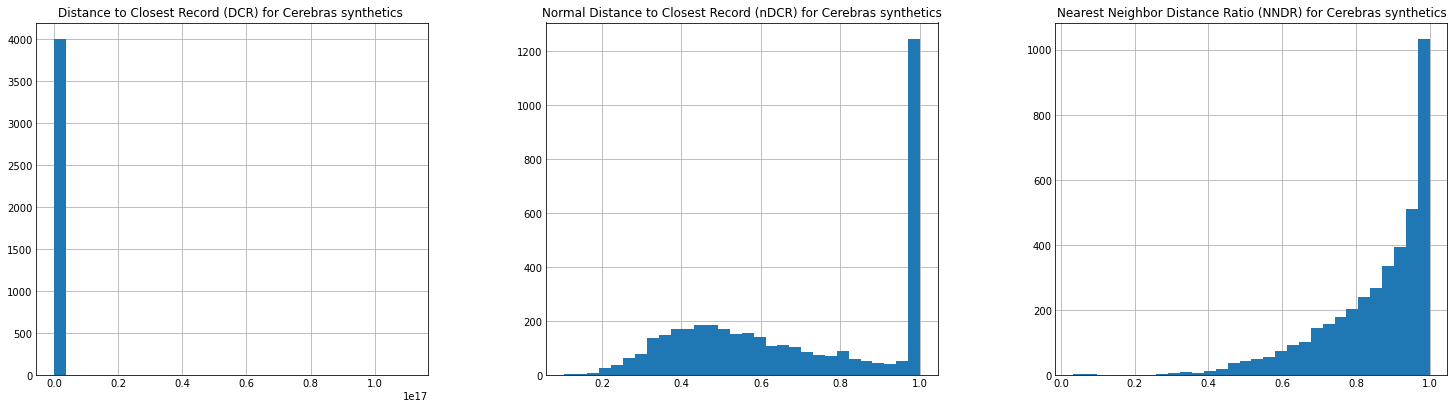

In [86]:
synt_privacy = pd.DataFrame(zip(dcr_synt3,dcr_synt_norm3,nndr_synt3),columns=['Distance to Closest Record (DCR) for Cerebras synthetics ','Normal Distance to Closest Record (nDCR) for Cerebras synthetics','Nearest Neighbor Distance Ratio (NNDR) for Cerebras synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

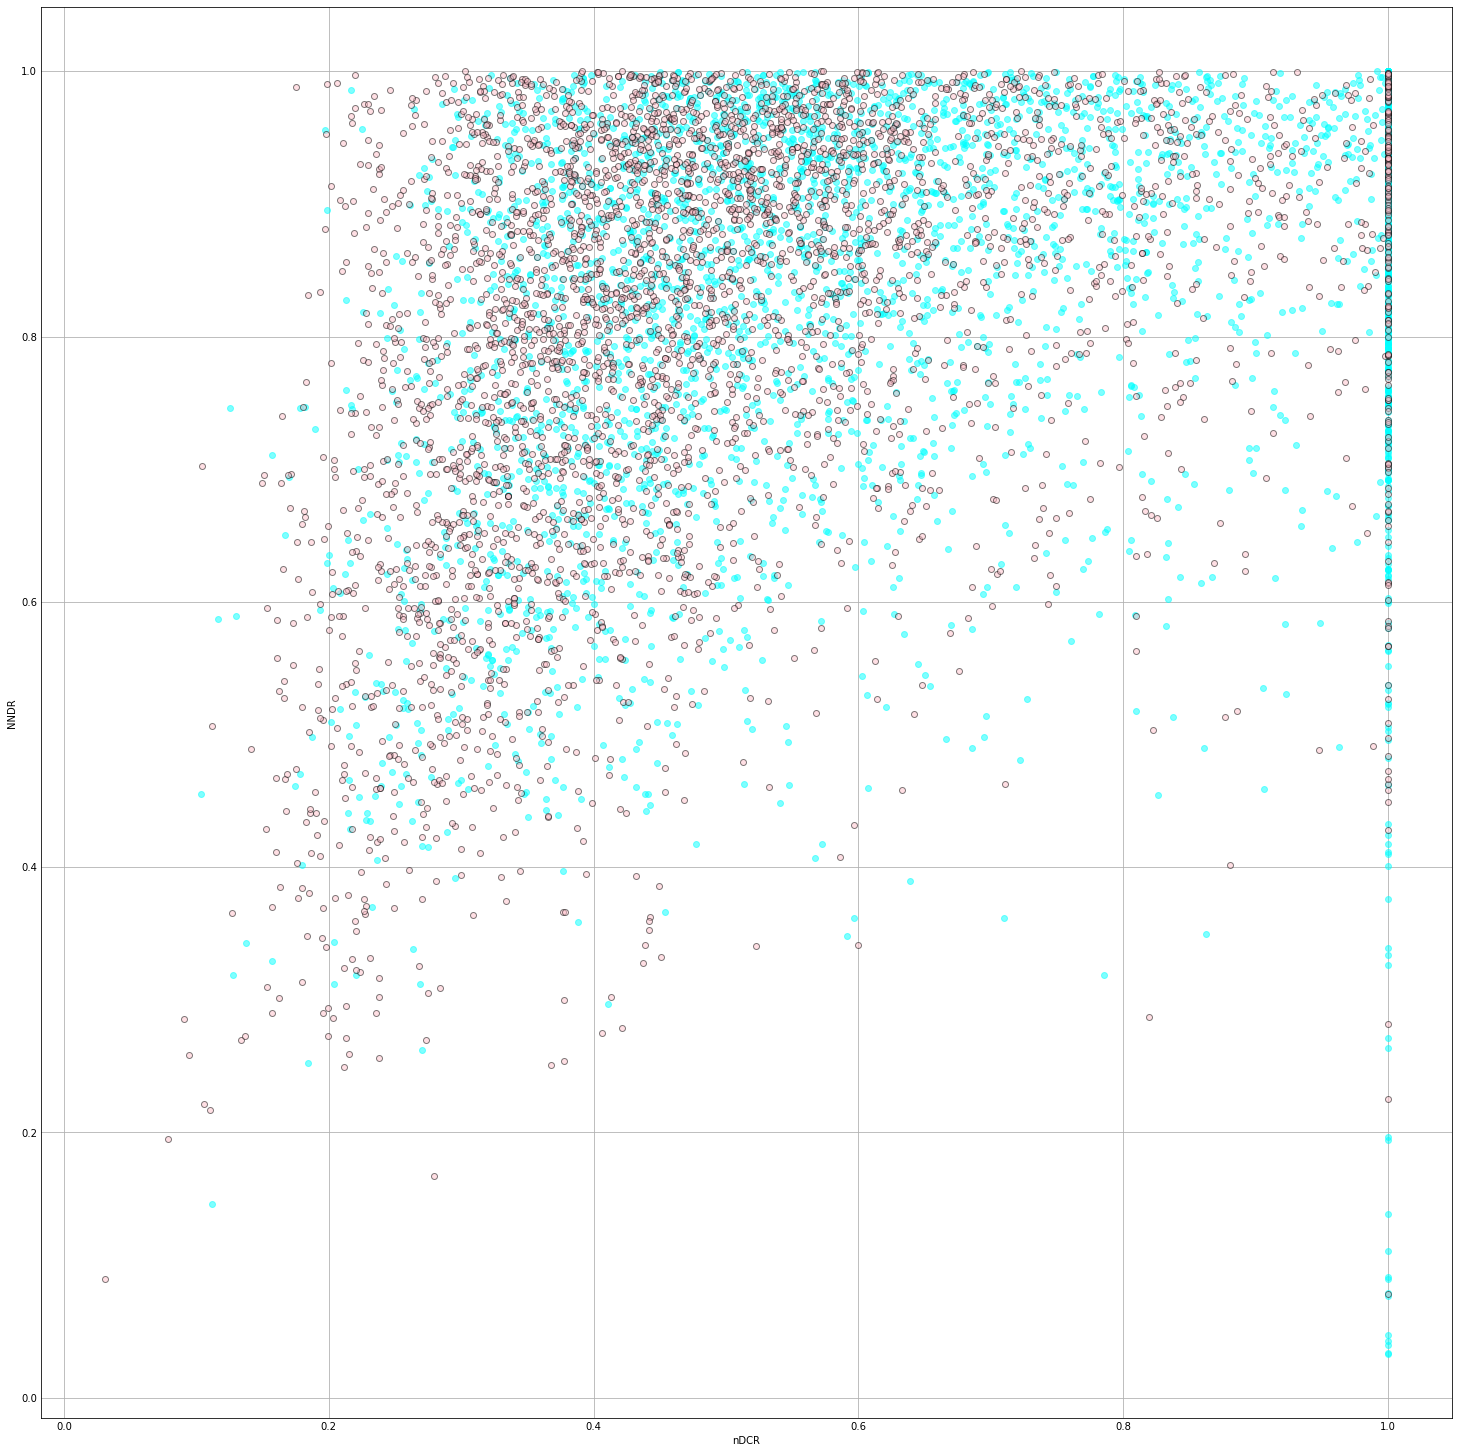

In [87]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm3, nndr_synt3, c='cyan', label='Cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [88]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm3)

2.9486673247778876

In [89]:
calc_nndr_ratio(nndr_real,nndr_synt3)

1.6578073089700998

In [90]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm3)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt3)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")
print ('')


print ('')
stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm3)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt3)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=4732373.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=6393945.000000, p-value=0.000000


 Kolmogorov-Smirnov Test for nDCR: statistic=0.30925000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.145750, p-value=0.000000


In [91]:
res_privacy = pd.DataFrame([['Cerebras', bound3,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm3),
                        calc_nndr_ratio(nndr_real,nndr_synt3),
                        np.median(dcr_synt_norm3),
                        np.median(nndr_synt3),
                        dcr_synt_norm3.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

## Phi-1.5 privacy

In [92]:
syn_test4 = synt_data_phi.sample(n=4000)

In [93]:
syn_test_neightbors4 = nn_model.kneighbors(syn_test4, n_neighbors=2)

In [94]:
print('Stats : mean, std, max, min, amount')
dcr_synt4 = syn_test_neightbors4[0][:, 0]
dcr2_synt4 = syn_test_neightbors4[0][:, 1]
nndr_synt4 = dcr_synt4 / np.maximum(dcr2_synt4, smoothing_factor)   
baseline_dcr = dcr_synt4
bound4 = np.quantile(baseline_dcr[~np.isnan(baseline_dcr)], dcr_quantile)
print('NNDR stats', nndr_synt4.mean(), nndr_synt4.std(), nndr_synt4.max(), nndr_synt4.min(), len (nndr_synt4))
dcr_synt_norm4 = np.where(dcr_synt4 <= bound, dcr_synt4 / bound, 1)
print('nDCR stats', dcr_synt_norm4.mean(), dcr_synt_norm4.std(), dcr_synt_norm4.max(), dcr_synt_norm4.min(), len (dcr_synt_norm4))

Stats : mean, std, max, min, amount
NNDR stats 0.8443692470414664 0.14637711651085533 1.0 0.018787330583928202 4000
nDCR stats 0.649378696206915 0.255812889580239 1.0 0.07918446838650538 4000


array([[<AxesSubplot:title={'center':'Distance to Closest Record (DCR) for Phi synthetics '}>,
        <AxesSubplot:title={'center':'Normal Distance to Closest Record (nDCR) for Phi synthetics'}>,
        <AxesSubplot:title={'center':'Nearest Neighbor Distance Ratio (NNDR) for Phi synthetics'}>]],
      dtype=object)

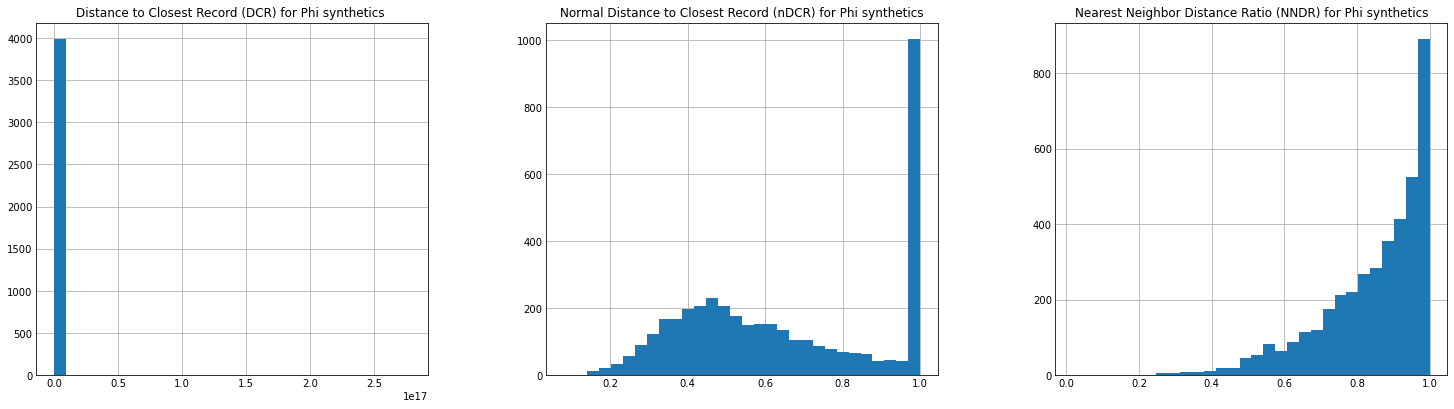

In [95]:
synt_privacy = pd.DataFrame(zip(dcr_synt4,dcr_synt_norm4,nndr_synt4),columns=['Distance to Closest Record (DCR) for Phi synthetics ','Normal Distance to Closest Record (nDCR) for Phi synthetics','Nearest Neighbor Distance Ratio (NNDR) for Phi synthetics'])
synt_privacy.hist(bins=privacy_number_of_bins, grid=True, figsize=(20, 5), layout=(1, 3))

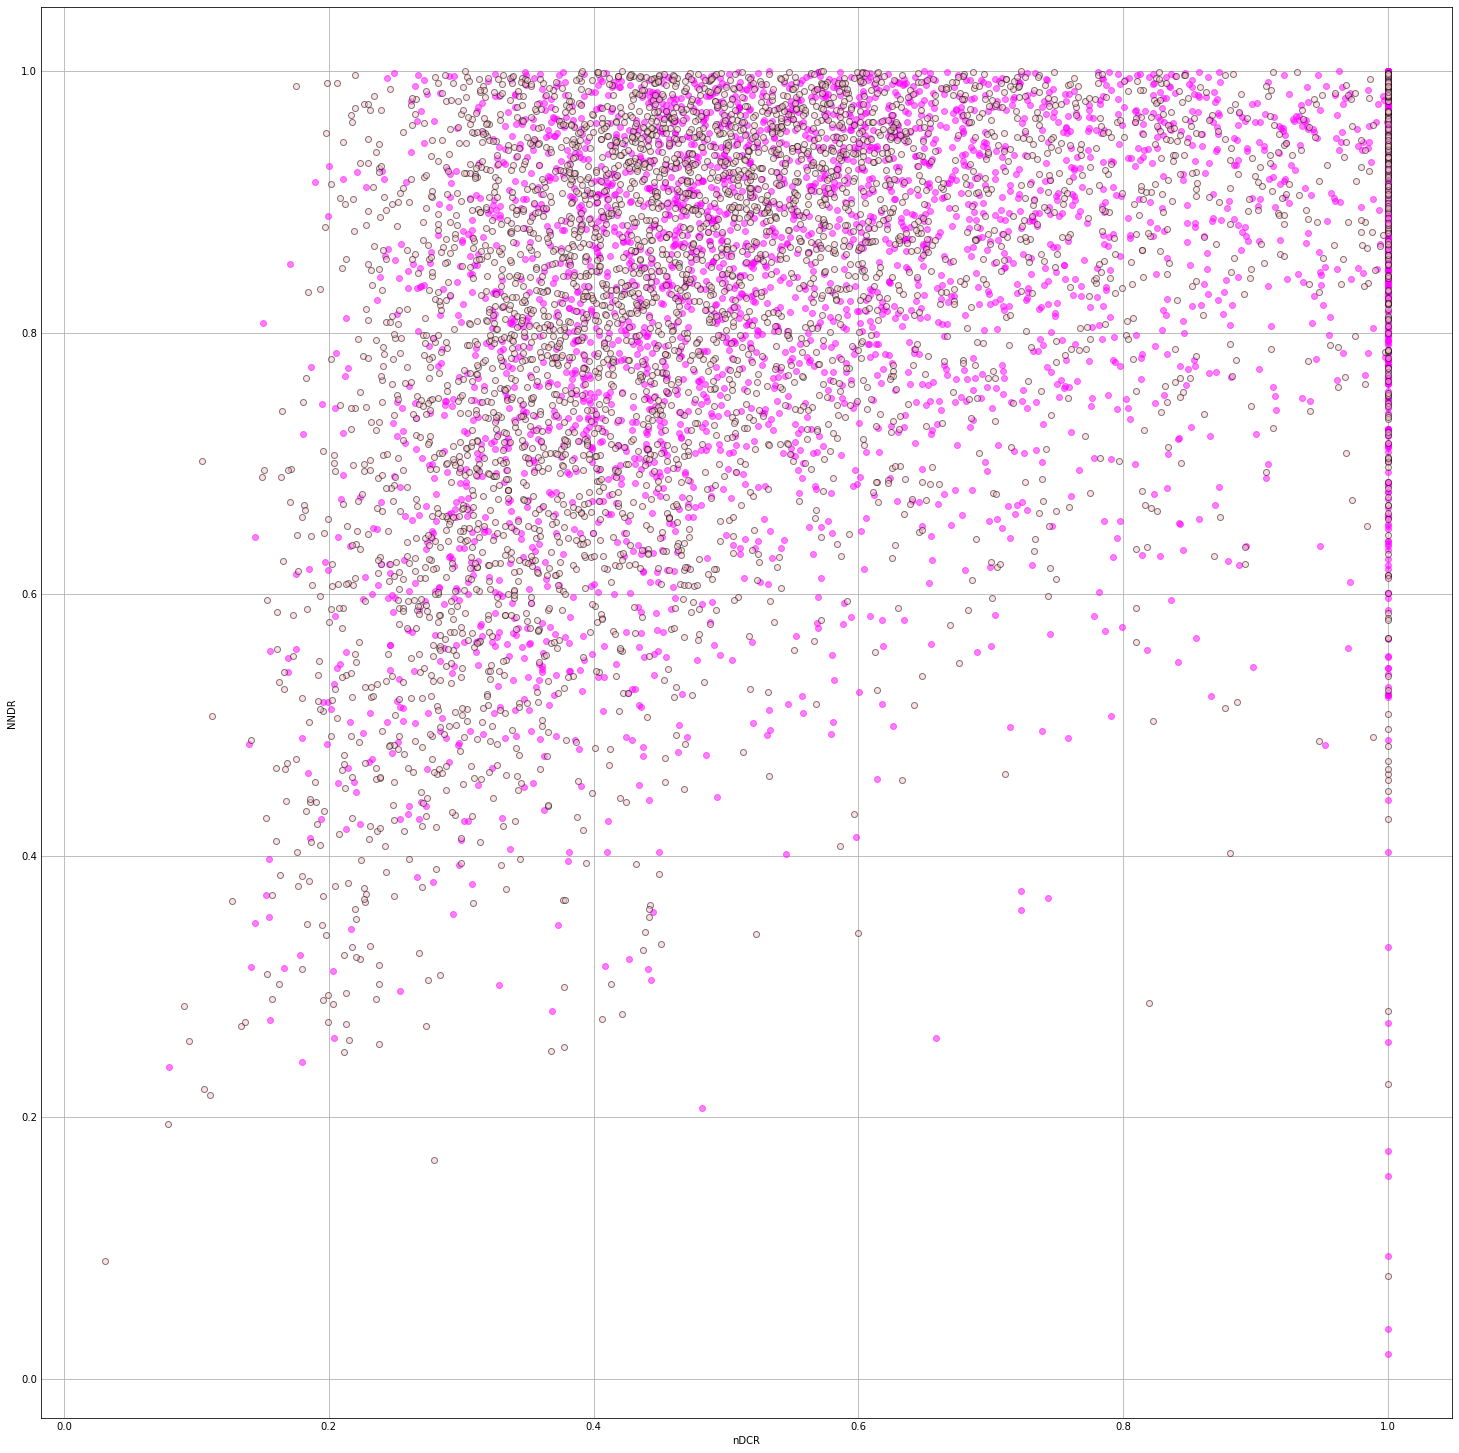

In [96]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm4, nndr_synt4, c='magenta', label='Phi-1.5', alpha=0.5, edgecolors='magenta')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [97]:
calc_dcr_ratio(dcr_real_norm,dcr_synt_norm4)

2.4873583260680037

In [98]:
calc_nndr_ratio(nndr_real,nndr_synt4)

1.5015634771732334

In [99]:
stat, p_value = mannwhitneyu(dcr_real_norm, dcr_synt_norm4)
print(f" Mann-Whitney U rank test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = mannwhitneyu(nndr_real, nndr_synt4)
print(f" Mann-Whitney U rank test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")
print ('')


print ('')
stat, p_value = ks_2samp(dcr_real_norm, dcr_synt_norm4)
print(f" Kolmogorov-Smirnov Test for nDCR: statistic={stat:.8f}, p-value={p_value:.8f}")
stat, p_value = ks_2samp(nndr_real, nndr_synt4)
print(f" Kolmogorov-Smirnov Test for NNDR: statistic={stat:.6f}, p-value={p_value:.6f}")

 Mann-Whitney U rank test for nDCR: statistic=5279110.00000000, p-value=0.00000000
 Mann-Whitney U rank test for NNDR: statistic=6692198.000000, p-value=0.000000


 Kolmogorov-Smirnov Test for nDCR: statistic=0.25325000, p-value=0.00000000
 Kolmogorov-Smirnov Test for NNDR: statistic=0.114750, p-value=0.000000


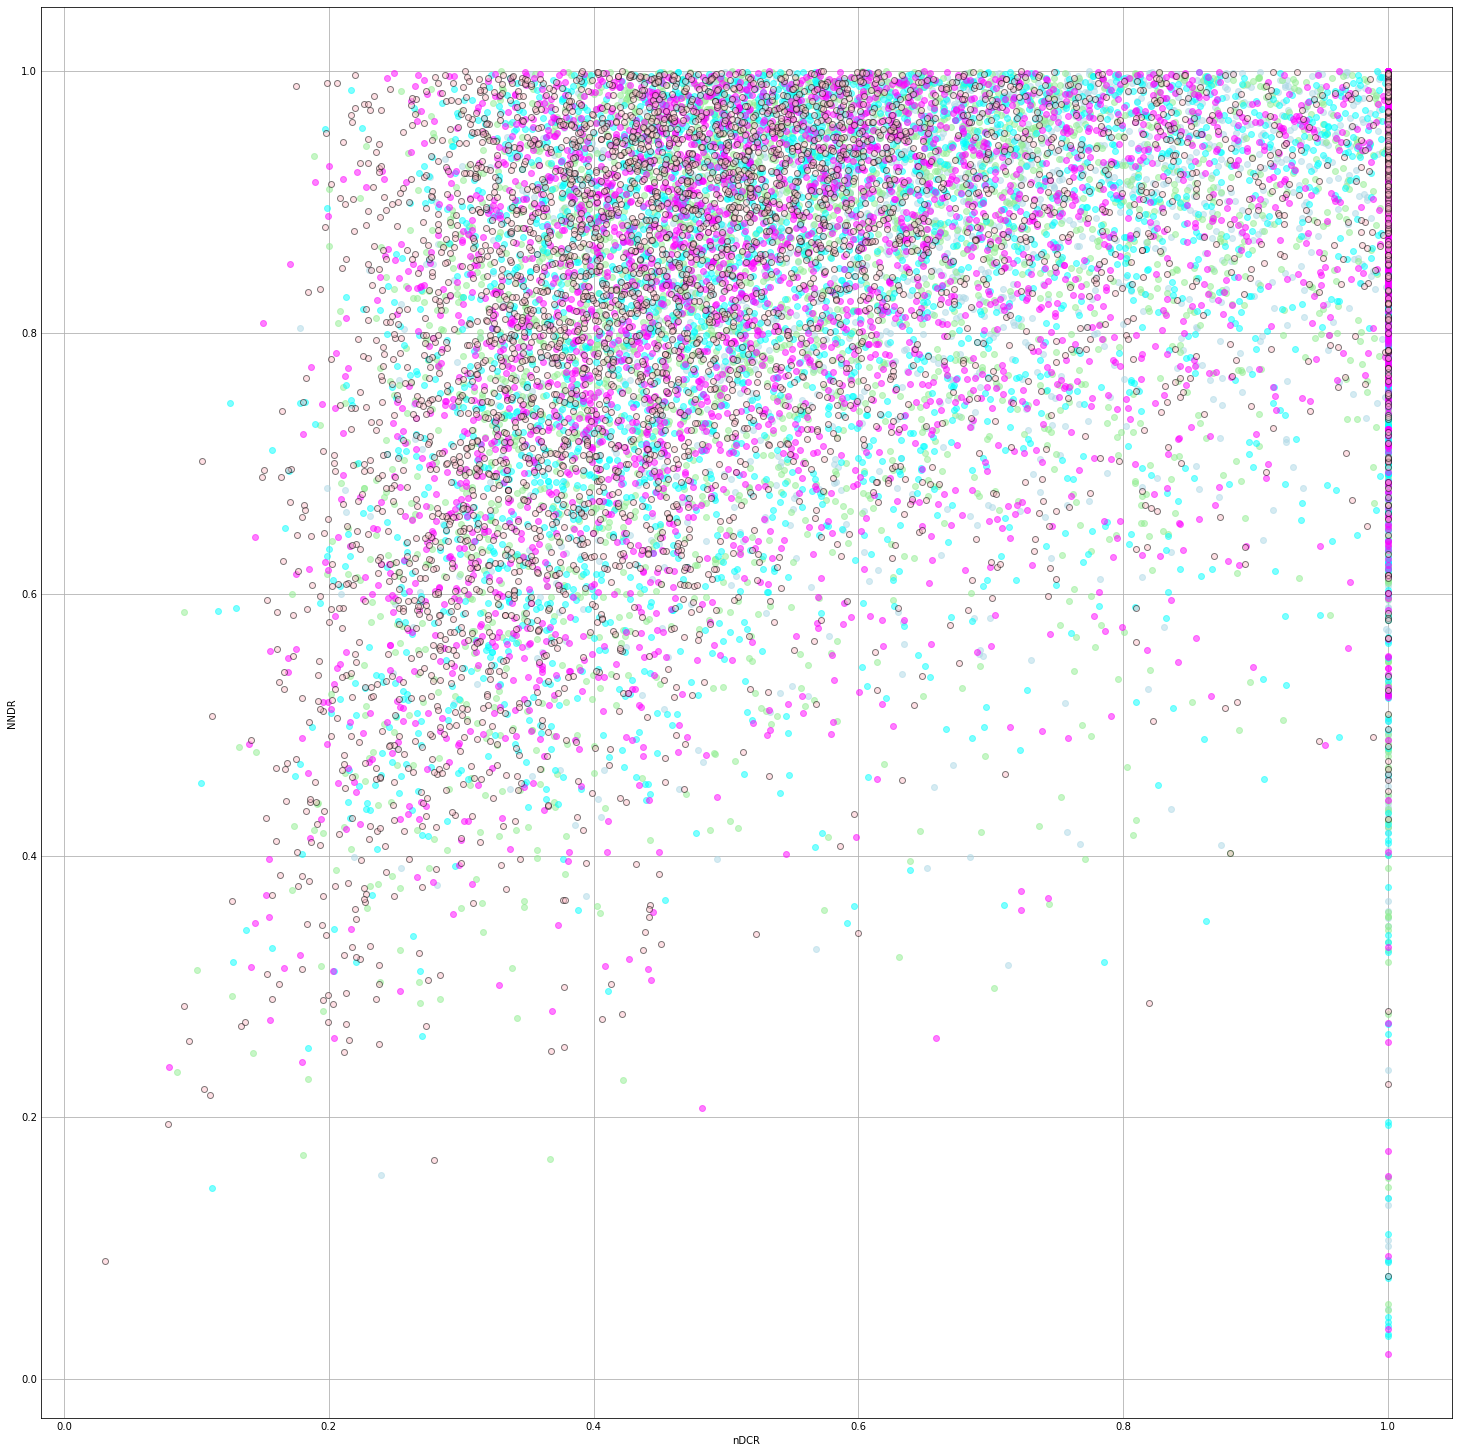

In [100]:
fig, ax = plt.subplots(figsize=(20, 20))
plt.xlabel("nDCR")
plt.ylabel("NNDR")
ax.scatter(dcr_synt_norm1, nndr_synt1, c='lightblue', label='DistilledGPT', alpha=0.5, edgecolors='lightblue')
ax.scatter(dcr_synt_norm2, nndr_synt2, c='lightgreen', label='GPT2xl', alpha=0.5, edgecolors='lightgreen')
ax.scatter(dcr_synt_norm3, nndr_synt3, c='cyan', label='Cerebras', alpha=0.5, edgecolors='cyan')
ax.scatter(dcr_synt_norm4, nndr_synt4, c='magenta', label='Phi-1.5', alpha=0.5, edgecolors='magenta')
ax.scatter(dcr_real_norm, nndr_real, c='pink', label='Real', alpha=0.5, edgecolors='black')
plt.show()

In [101]:
res_privacy = pd.DataFrame([['Phi1.5', bound4,
                        calc_dcr_ratio(dcr_real_norm,dcr_synt_norm4),
                        calc_nndr_ratio(nndr_real,nndr_synt4),
                        np.median(dcr_synt_norm4),
                        np.median(nndr_synt4),
                        dcr_synt_norm4.min()    ]],
                        columns=['Model','95% bound','DCRn ratio','NNDR ratio','DCRn median', 'NNDR median','Minimal distance'])

privacy_results = pd.concat([privacy_results, res_privacy],axis=0)

In [102]:
privacy_results

,Model,95% bound,DCRn ratio,NNDR ratio,DCRn median,NNDR median,Minimal distance
0,Real dataset,7.432463e+00,1.000000,1.000000,0.455280,0.844917,0.030743
0,Distilled GPT,1.389243e+16,15.528926,3.987531,1.000000,0.962051,0.178511
0,GPT2XL,1.331193e+03,3.145078,1.715547,0.664541,0.896656,0.085141
0,Cerebras,8.020314e+02,2.948667,1.657807,0.650069,0.898723,0.103492
0,Phi1.5,1.258419e+02,2.487358,1.501563,0.601048,0.886688,0.079184


In [103]:
privacy_results.to_csv('privacy_results_shorthouses_temp1.9.csv')